<a href="https://colab.research.google.com/github/Shivangi-Bhadouria/Data-Science-Projects/blob/main/Retail_Sales_Forecasting_Dissertation_Work%2B_MS_(LJMU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Retail Sales Forecasting</h1>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !ls drive/MyDrive/Sales_forecast

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import math
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
def converttonumber(col, df):
    colvalues = df[col].value_counts()
    colvaluelist = colvalues.index
    colvaluesseries = pd.Series(colvaluelist)
    
    for ivalue in range(0,len(colvaluesseries)):
        df[col].replace(colvaluesseries[ivalue], colvaluesseries[colvaluesseries == colvaluesseries[ivalue]].index[0], inplace=True)
    return df

In [ ]:
# data import
holidays = pd.read_csv("holidays_events.csv")
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays[holidays.transferred == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [ ]:
holidays[holidays.type == "Transfer"]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [ ]:
holidays[(holidays.type == "Work Day") ]

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [ ]:
holidays.shape

(350, 6)

In [ ]:
holidays['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [ ]:
# data import
oil = pd.read_csv("oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,nan
1,2013-01-02,93.140
2,2013-01-03,92.970
3,2013-01-04,93.120
4,2013-01-07,93.200


In [ ]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
oil.shape

(1218, 2)

In [ ]:
# data import
stores = pd.read_csv("stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:

len(stores.store_nbr.unique())

54

In [ ]:
stores.shape

(54, 5)

In [ ]:
# data import
train = pd.read_csv("train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0


In [ ]:
# data import
transactions = pd.read_csv("transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.shape 

(83488, 3)

In [ ]:
transactions.describe()

,store_nbr,transactions
count,83488.000,83488.000
mean,26.939,1694.602
std,15.608,963.287
min,1.000,5.000
25%,13.000,1046.000
50%,27.000,1393.000
75%,40.000,2079.000
max,54.000,8359.000


## Merged Data

Since the data is splitted into multiple files and dataframe it is the best approach to combine it and then review the feature.

In [ ]:
final_data = pd.merge(train, holidays, on="date", how="left")
final_data.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
final_data.shape

(3054348, 11)

In [ ]:
final_data = pd.merge(final_data, stores, on="store_nbr", how="left")
final_data.head() 

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13


In [ ]:
final_data.shape

(3054348, 15)

In [ ]:
final_data = pd.merge(final_data, oil, on="date", how="left")
final_data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan


In [ ]:
final_data.shape 

(3054348, 16)

In [ ]:
final_data = pd.merge(final_data,transactions,on=["date","store_nbr"], how="left")
final_data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan


In [ ]:
len(final_data.store_nbr.unique())

54

In [ ]:
final_data.shape

(3054348, 17)

In [ ]:
# final_data[final_data.sales == 0.0]
train[["date","store_nbr"]].nunique()

date         1684
store_nbr      54
dtype: int64

In [ ]:
train["date"].subtract

<bound method _flex_method_SERIES.<locals>.flex_wrapper of 0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3000883    2017-08-15
3000884    2017-08-15
3000885    2017-08-15
3000886    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: object>

### Check the structure of the data (normal routine check)

In [ ]:
final_data['transferred'].value_counts()

False    486486
True      16038
Name: transferred, dtype: int64

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   type_x        object 
 7   locale        object 
 8   locale_name   object 
 9   description   object 
 10  transferred   object 
 11  city          object 
 12  state         object 
 13  type_y        object 
 14  cluster       int64  
 15  dcoilwtico    float64
 16  transactions  float64
dtypes: float64(3), int64(4), object(10)
memory usage: 419.5+ MB


### Data type conversion

In [ ]:
#convert date column into date-time format
final_data['date'] = pd.to_datetime(final_data['date'])

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   type_x        object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  city          object        
 12  state         object        
 13  type_y        object        
 14  cluster       int64         
 15  dcoilwtico    float64       
 16  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 419.5+ MB


In [ ]:
#extracting year from date column
final_data['year'] = pd.DatetimeIndex(final_data['date']).year

In [ ]:
final_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'type_x',
       'locale', 'locale_name', 'description', 'transferred', 'city', 'state',
       'type_y', 'cluster', 'dcoilwtico', 'transactions', 'year'],
      dtype='object')

In [ ]:
final_data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,dcoilwtico,transactions,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,nan,nan,2013


### Rename columns

In [ ]:
# Rename column ‘type’ present in holidays_events dataset and ‘type’ column present in stores dataset as ‘holiday_type’ and 
#‘store_type’ respectively in order to differentiate both the columns present in the merged dataset.

final_data.rename(columns = {'type_x':'holiday_type', 'type_y':'store_type'}, inplace = True)

In [ ]:
final_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'city', 'state', 'store_type', 'cluster', 'dcoilwtico', 'transactions',
       'year'],
      dtype='object')

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  city          object        
 12  state         object        
 13  store_type    object        
 14  cluster       int64         
 15  dcoilwtico    float64       
 16  transactions  float64       
 17  year          int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
memory usage: 442.8+ MB


### Data Quality Check and missing values

In [ ]:
# Are there any missing values?
final_data.isnull().sum() 

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
city                  0
state                 0
store_type            0
cluster               0
dcoilwtico       955152
transactions     249117
year                  0
dtype: int64

In [ ]:
# null value percentage
((final_data.isnull().sum()/final_data.shape[0])*100).round(2)

id              0.000
date            0.000
store_nbr       0.000
family          0.000
sales           0.000
onpromotion     0.000
holiday_type   83.550
locale         83.550
locale_name    83.550
description    83.550
transferred    83.550
city            0.000
state           0.000
store_type      0.000
cluster         0.000
dcoilwtico     31.270
transactions    8.160
year            0.000
dtype: float64

### Imputation




Ideally we should remove columns with high missing value percentage, here **`>40%`** because our inference says that dropping such columns won't affect our further analysis. But computing null values as `mode` may cause change in converted ratio for particular feature rather we create new categories for some of the required columns such as, for: 

- **holiday_type** : No 

- **dcoilwtico** : mean

- **transactions** : 0 


In [ ]:
# Lets impute null values for column 'day_type'

final_data['holiday_type'] = final_data['holiday_type'].fillna('No')
#final_data['locale'] = final_data['locale'].fillna('NA')
#final_data['locale_name'] = final_data['locale_name'].fillna('NA')
#final_data['description'] = final_data['description'].fillna('NA')
#final_data['transferred'] = final_data['transferred'].fillna('NA')

In [ ]:
# null value percentage
((final_data.isnull().sum()/final_data.shape[0])*100).round(2)

id              0.000
date            0.000
store_nbr       0.000
family          0.000
sales           0.000
onpromotion     0.000
holiday_type    0.000
locale         83.550
locale_name    83.550
description    83.550
transferred    83.550
city            0.000
state           0.000
store_type      0.000
cluster         0.000
dcoilwtico     31.270
transactions    8.160
year            0.000
dtype: float64

- **Need to check the best metric to impute the missing values <40% for columns `dcoilwtico` and `transactions`** 

Use mean value to replace the missing values in case the data distribution is `symmetric` in numerical columns. Consider median or mode with skewed data distribution.




**`dcoilwtico`**


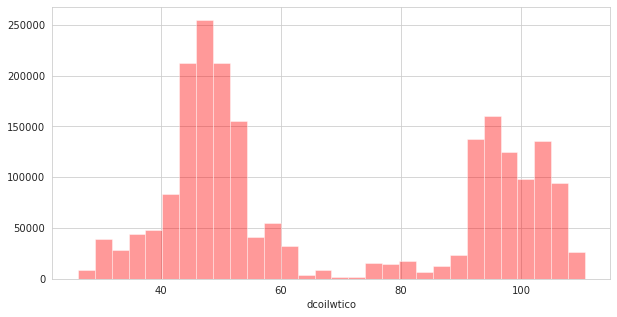

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.distplot(final_data['dcoilwtico'], kde = False, color ='red', bins = 30)
plt.show()

- Since, data is normally distributed so replace the null values with the mean value.

In [ ]:
#round(final_data.dcoilwtico.mean(),2)
final_data.dcoilwtico.mean()

68.01587436358177

- **Remark: `68.02` is the best suited mean value to replace all the null values in column `dcoilwtico`**

**2. `transactions`**

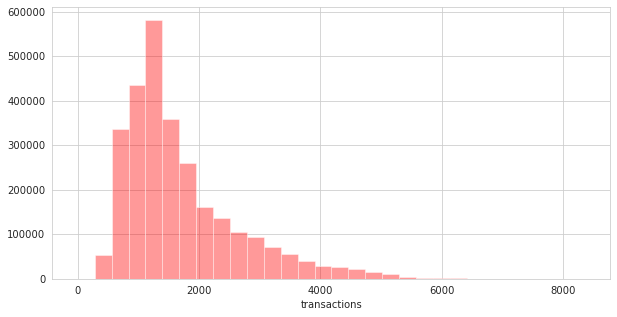

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.distplot(final_data['transactions'], kde = False, color ='red', bins = 30)
plt.show()

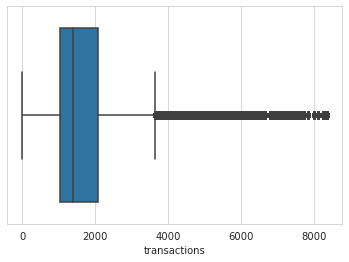

In [ ]:

sns.boxplot(final_data['transactions'])
plt.show()

- As we can observe in the above distribution plot, data is not normally distributed and we can also observe in the above boxplot, large number of outliers are present. So, replace the null values with its `median value`.

In [ ]:
final_data.transactions.median()

1395.0

In [ ]:
final_data.transactions.mean()

1697.0714411754327

In [ ]:
# replace missing values present in the given numerical columns with their respective metrics
final_data['dcoilwtico'].fillna(final_data.dcoilwtico.mean(), inplace=True) 
# final_data['transactions'][(final_data.sales == 0.0)] = 0.0 
final_data['transactions'].fillna(0, inplace=True)  

In [ ]:
final_data[(final_data.sales >0.0)]['transactions'].mean() # logically this should not happen sales are 0 hai and transaction >0 


1744.7144711028764

In [ ]:
final_data[(final_data.sales == 0.0) & (final_data.transactions >0 )][['transactions','sales']] 


,transactions,sales
561,770.000,0.000
562,770.000,0.000
565,770.000,0.000
567,770.000,0.000
575,770.000,0.000
...,...,...
3054299,2621.000,0.000
3054313,2621.000,0.000
3054316,2155.000,0.000
3054319,2155.000,0.000


In [ ]:
# cross check the missing values
final_data.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type          0
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
city                  0
state                 0
store_type            0
cluster               0
dcoilwtico            0
transactions          0
year                  0
dtype: int64

### Checking outliers

In [ ]:
# describing continuous variables
final_data[['dcoilwtico', 'store_nbr', 'cluster', 'transactions', 'sales', 'onpromotion']].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99]).apply(lambda s: s.apply('{0:.2f}'.format))
#round(final_data.describe(percentiles = [0.25,0.50,0.75,0.90,0.95]),2)

,dcoilwtico,store_nbr,cluster,transactions,sales,onpromotion
count,3054348.00,3054348.00,3054348.00,3054348.00,3054348.00,3054348.00
mean,68.02,27.50,8.48,1558.66,359.02,2.62
std,21.30,15.59,4.65,1036.47,1107.29,12.25
min,26.19,1.00,1.00,0.00,0.00,0.00
25%,49.10,14.00,4.00,931.00,0.00,0.00
50%,68.02,27.50,8.50,1332.00,11.00,0.00
75%,91.53,41.00,13.00,1980.00,196.01,0.00
90%,100.71,49.00,15.00,2997.00,869.00,4.00
95%,104.19,52.00,15.00,3643.00,1971.00,13.00
99%,107.52,54.00,17.00,4837.00,5527.00,56.00


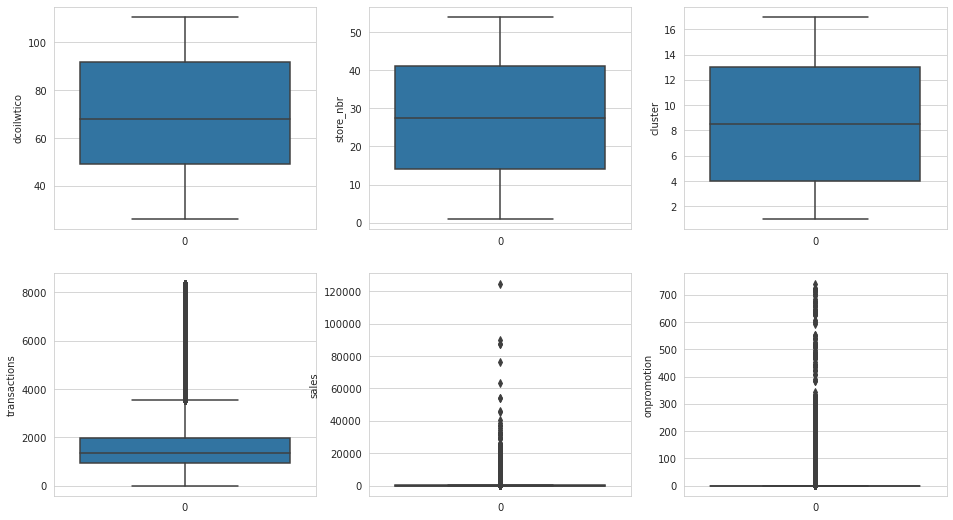

In [ ]:
# visualize the columns
plt.figure(figsize=(16,9))
plt.subplot(2,3,1)

sns.boxplot(data=final_data['dcoilwtico'])
plt.ylabel("dcoilwtico")

plt.subplot(2,3,2)
sns.boxplot(data=final_data['store_nbr'])
plt.ylabel("store_nbr")

plt.subplot(2,3,3)
sns.boxplot(data=final_data['cluster'])
plt.ylabel("cluster")

plt.subplot(2,3,4)
sns.boxplot(data=final_data['transactions'])
plt.ylabel("transactions")

plt.subplot(2,3,5)
sns.boxplot(data=final_data['sales'])
plt.ylabel("sales")

plt.subplot(2,3,6)
sns.boxplot(data=final_data['onpromotion'])
plt.ylabel("onpromotion")

plt.show()

**Inference:** Here, we can clearly observe the columns `transactions`, `sales`, and `onpromotion` have few outliers. Value are symmetric till 99% but beyond 99%, there is insignificant increase in their values. 

### Data Analysis

In [ ]:
final_data.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,dcoilwtico,transactions,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,68.016,0.000,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,68.016,0.000,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,68.016,0.000,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,68.016,0.000,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,68.016,0.000,2013


### Data Imbalance Percentage of `transferred` variable

In [ ]:
#check the imbalance percentage

((final_data['transferred'].value_counts(normalize=True))*100).round(2)

False   96.810
True     3.190
Name: transferred, dtype: float64

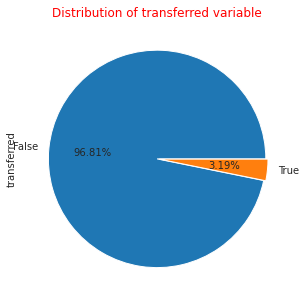

In [ ]:
sns.set_style()
plt.figure(figsize=(5, 5))
final_data['transferred'].value_counts().plot(kind="pie",autopct='%1.2f%%', explode = [0, 0.02 ])
plt.title("Distribution of transferred variable", fontdict={'size':12, 'color':'red'})
plt.show()

We can see there is a huge data imbalance percentage in the given dataset.


**`Inference 1`:** `96.81%` of holidays are not transferred actually to another date.

**`Inference 2`:** `3.19%` of holidays are officially falls on the calendar day but transferred (moved) to another date by the government. 


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  city          object        
 12  state         object        
 13  store_type    object        
 14  cluster       int64         
 15  dcoilwtico    float64       
 16  transactions  float64       
 17  year          int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
memory usage: 442.8+ MB


### Univariate Analysis

Perform univariate analysis for both `Categorical` and `Continuous` variables.


- #### For Numerical Variables

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 


**1. dcoilwtico**

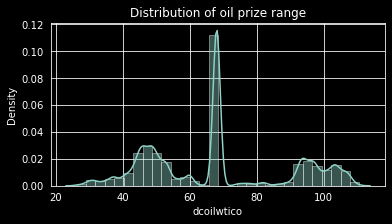

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(6,3))
sns.distplot(final_data.dcoilwtico, bins=30)
plt.title("Distribution of oil prize range", fontsize=12)
plt.show()

**2. sales**

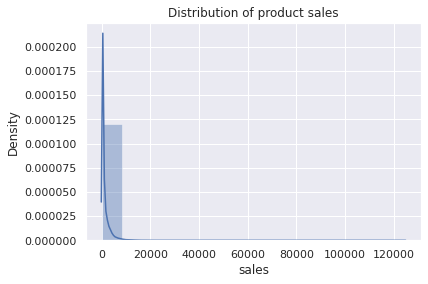

In [ ]:
sns.set_theme()
sns.distplot(final_data.sales, bins=15)
plt.title("Distribution of product sales", fontsize=12)
plt.show()

**3. Transactions**

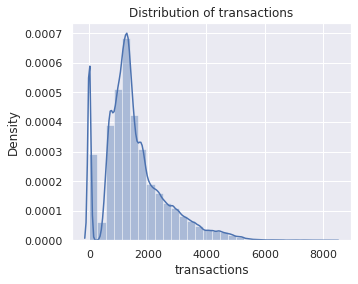

In [ ]:
sns.set_theme()
plt.figure(figsize=(5,4))
sns.distplot(final_data.transactions, bins=30)
plt.title("Distribution of transactions", fontsize=12)
plt.show()

- **Categorical Variables**

#### Pie-Chart and Bar Chart


For analysing how a numeric variable changes across several categories of a categorical variable we can utilise either a pie chart or a bar chart.

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  city          object        
 12  state         object        
 13  store_type    object        
 14  cluster       int64         
 15  dcoilwtico    float64       
 16  transactions  float64       
 17  year          int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
memory usage: 442.8+ MB


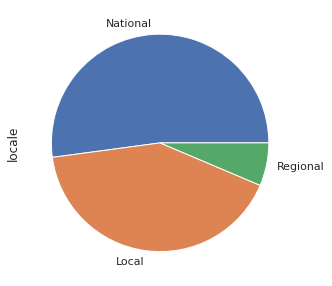

In [ ]:
plt.figure(figsize=(5,5))

final_data['locale'].value_counts().plot.pie()
plt.xticks(rotation=360)
plt.show()

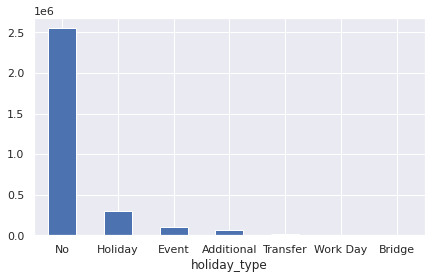

In [ ]:
plt.figure(figsize=(7,4))

sns.set_theme()
final_data['holiday_type'].value_counts().plot.bar()
plt.xlabel("holiday_type")
plt.xticks(rotation=360)
plt.show()

In [ ]:
#Check values across different categories of store_type

(final_data['store_type'].value_counts(normalize=True))*100

D   33.333
C   27.778
A   16.667
B   14.815
E    7.407
Name: store_type, dtype: float64

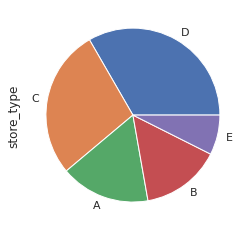

In [ ]:
final_data['store_type'].value_counts().plot.pie()
plt.show()

### Bivariate Analysis:


Perform Bivariate analysis for both `Categorical` and `Continuous` variables 

- #### For Categorical-Categorical Variables

In [ ]:
categorical_var = ['family', 'holiday_type', 'locale','locale_name','city','state']

In [ ]:
len(categorical_var)

6

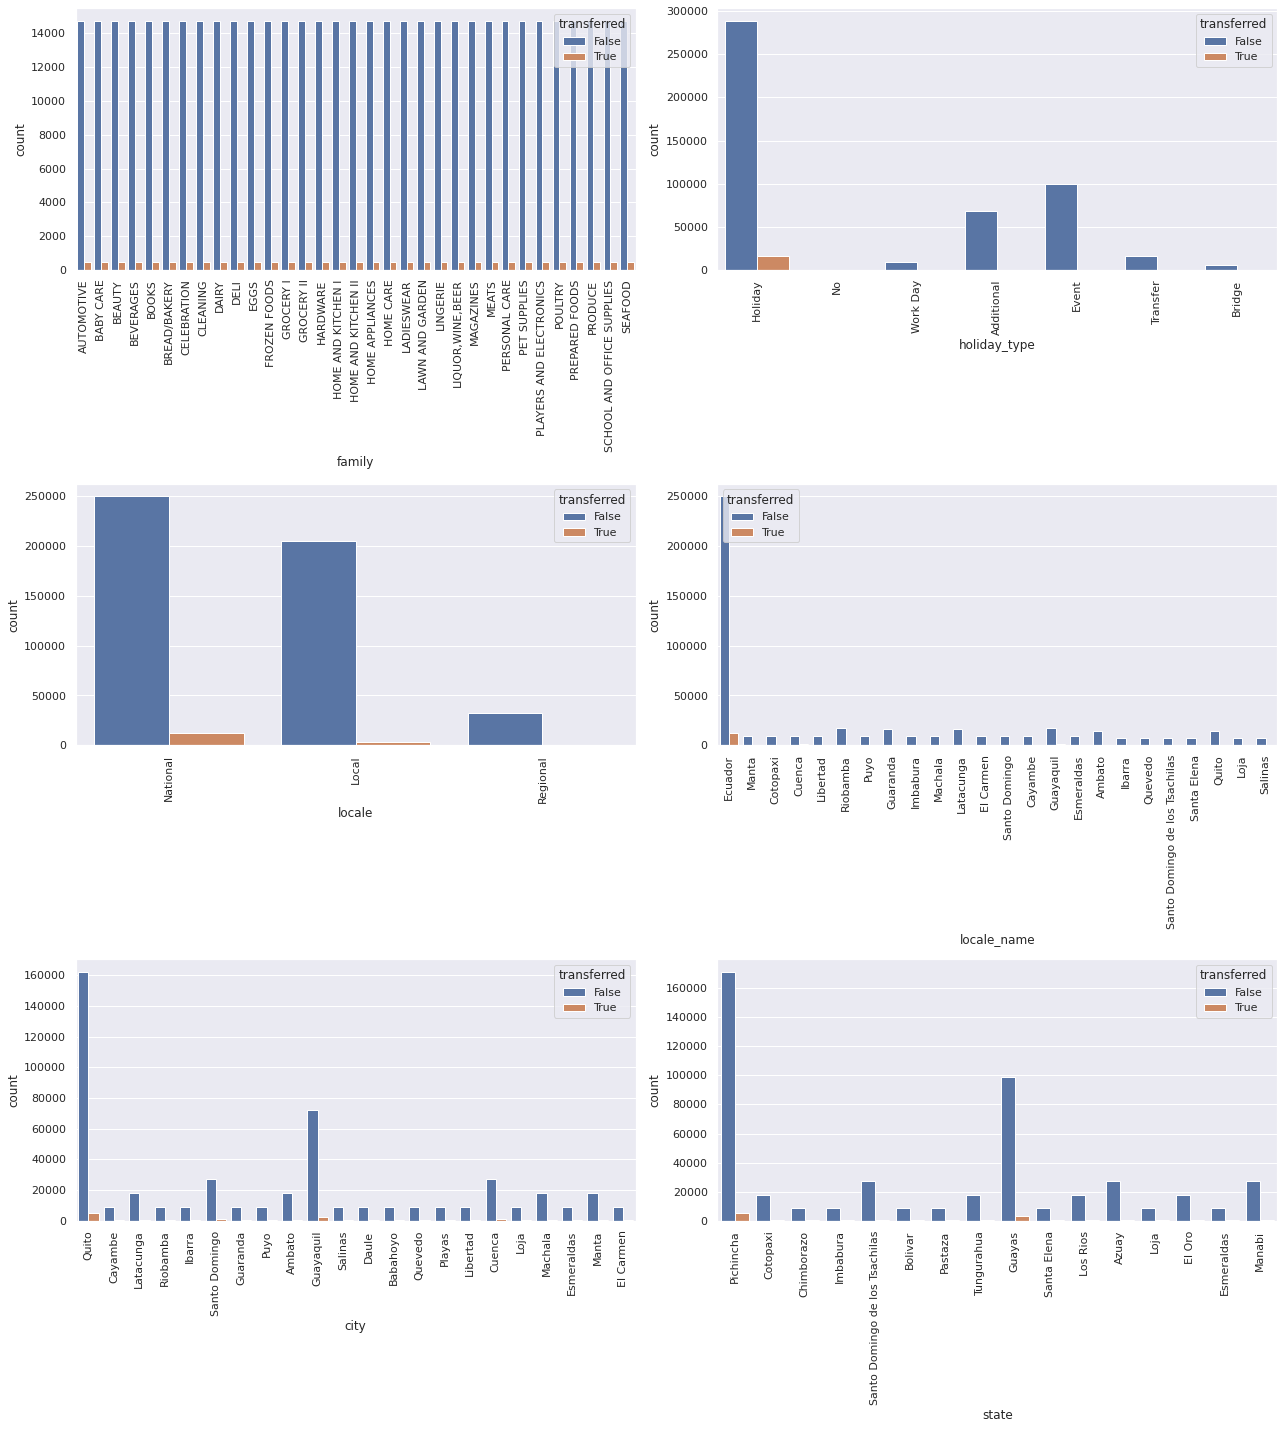

In [ ]:
# plot Categorical variables

plt.figure(figsize = (18,20))

for row in enumerate(categorical_var):    
    plt.subplot(math.ceil(len(categorical_var)/2),2,row[0]+1)
    sns.countplot(x=row[1],hue='transferred',data = final_data)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

- #### For Numerical-Numerical Variables

**Pair Plots**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.


- When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix.
 
 
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 
 
 - For the diagonal views, it plots a **histogram**

In [ ]:
continuous_var = ['sales','onpromotion', 'dcoilwtico', 'transactions']

<Figure size 5760x2160 with 0 Axes>

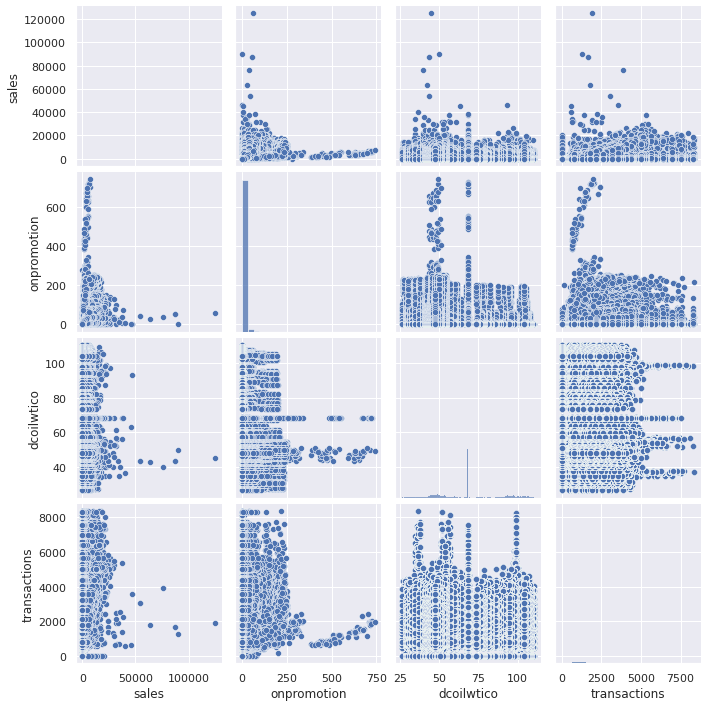

In [ ]:
# Plot continuous variables

plt.figure(figsize=(80,30))
sns.pairplot(final_data[continuous_var])
plt.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. They're pretty useful in regression problems to check whether a linear trend exists in the data or not.



- **Reg Plots**

These are an extension to the jointplots, where a regression line is added to the view 

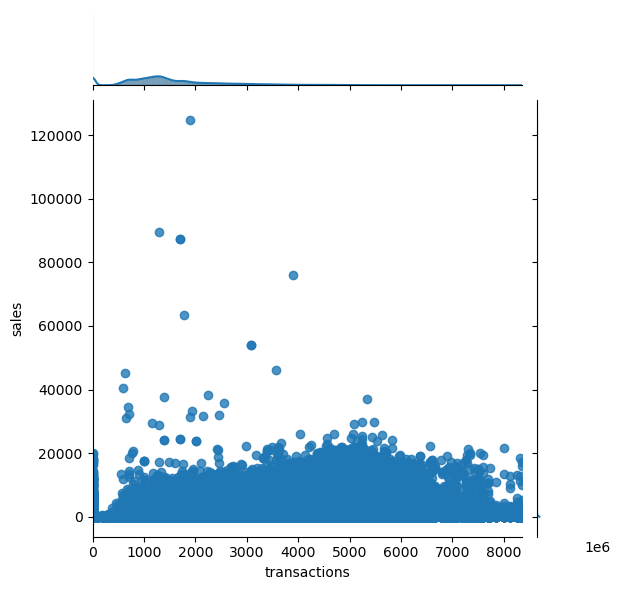

In [ ]:
#@title 
# Plot using a jointplot
plt.style.use('default')
sns.jointplot(final_data.transactions, final_data.sales, kind='reg')
plt.show()

### Data Visualization

**Multivariate Analysis**

- #### Correlation Heat map


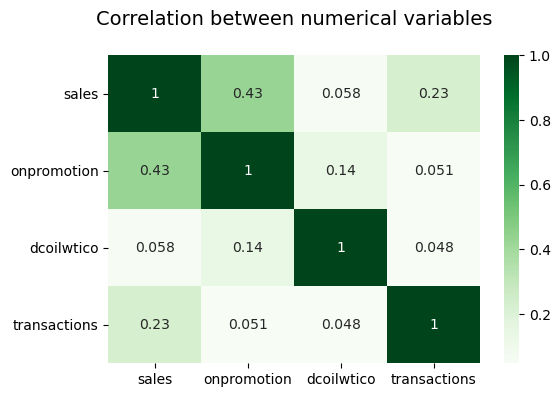

In [ ]:
#plotting heat map for all the required numerical columns

plt.style.use('default')
plt.figure(figsize=(6,4))

sns.heatmap(final_data[continuous_var].corr().abs(),annot= True,cmap='Greens')
plt.title('Correlation between numerical variables\n',fontdict={'color':'black', 'size':14})

plt.show()

From the above Correlation matrix, it seems not much correlation exist in between features. So we dont have any dependant variables.

Now, lets check the impact of holiday on the sales and transactions. One of the analysis we  want to check is:


**Does the type of holiday makes any difference on sales and transactions? For example, does local holiday makes more sale than national. Both are holiday but does locale has any impact?**



Now, based on the below summary it seems that locale has no impact. We want to analyse that, lets say if count of 100 holiday is only 10 i.e. 10%, but the sales and trasanctions for that locale is more than 10%. It would mean for specific locale holiday, sales and trasanctions are more compared to others. But we can observe the below summary, that is not the case there. Numbers are in proportion irrespective of the holiday type.

In [ ]:
(final_data[['locale', 'sales', 'transactions']].dropna().groupby(by='locale').sum()).join(final_data[['locale', 'sales', 'transactions']].dropna().groupby(by='locale').count(), on='locale', how='inner', lsuffix='_sum', rsuffix='_count')

,sales_sum,transactions_sum,sales_count,transactions_count
locale,,,,
Local,76343288.278,327509127.000,208494,208494
National,109169609.556,448199202.000,261954,261954
Regional,12413597.593,49930815.000,32076,32076


Same analysis for `tranfered` column

In [ ]:
(final_data[['transferred', 'sales', 'transactions']].dropna().groupby(by='transferred').sum()).join(final_data[['transferred', 'sales', 'transactions']].dropna().groupby(by='transferred').count(), on='transferred', how='inner', lsuffix='_sum', rsuffix='_count')

,sales_sum,transactions_sum,sales_count,transactions_count
transferred,,,,
False,192929692.489,804832743.000,486486,486486
True,4996802.938,20806401.000,16038,16038




If you calculate the above values in terms of percentage then we dont see any significant influence of these values on sales and trasnactions which means it does not matter which holiday it is, only matters if its holiday or not.

So, by considering the above conclusion, we can remove the descriptive columns of holiday `locale, locale_name, description,` and `transferred `.

Similarly, City and State columns will also not impact our analysis as `store_number` will suffice as a store identity. So we can drop columns `city` and `state` as well.

In [ ]:
final_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'city', 'state', 'store_type', 'cluster', 'dcoilwtico', 'transactions',
       'year'],
      dtype='object')

In [ ]:
final_data.drop(['locale','locale_name', 'description', 'transferred'], inplace=True, axis=1)
final_data.drop(['city', 'state'], inplace=True, axis=1)
final_data.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,D,13,68.016,0.000,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,D,13,68.016,0.000,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,D,13,68.016,0.000,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,D,13,68.016,0.000,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,D,13,68.016,0.000,2013


In [ ]:
final_data.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
holiday_type    0
store_type      0
cluster         0
dcoilwtico      0
transactions    0
year            0
dtype: int64

In [ ]:
final_data.shape

(3054348, 12)

In [ ]:

# use the converttonumber function that we defined above in order to convert the column values with their number of occurences 
final_data = converttonumber('holiday_type', final_data)
final_data = converttonumber('family', final_data)
final_data = converttonumber('store_type', final_data)
#final_data['date'] = final_data['date'].str.replace('-','')
final_data.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions,year
0,0,2013-01-01,1,30,0.000,0,1,0,13,68.016,0.000,2013
1,1,2013-01-01,1,29,0.000,0,1,0,13,68.016,0.000,2013
2,2,2013-01-01,1,28,0.000,0,1,0,13,68.016,0.000,2013
3,3,2013-01-01,1,14,0.000,0,1,0,13,68.016,0.000,2013
4,4,2013-01-01,1,16,0.000,0,1,0,13,68.016,0.000,2013



**Inference:** Finally we got the list of required final data features for train dataset.

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        int64         
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  int64         
 7   store_type    int64         
 8   cluster       int64         
 9   dcoilwtico    float64       
 10  transactions  float64       
 11  year          int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 302.9 MB


# Model Building

## 1. Linear Regression


We have demonstrated how to deal with variables which do not exhibit a linear relationship with the target variable. Furthermore, we dealt with the overfitting and built a generalisable model.

In [ ]:
final_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'holiday_type', 'store_type', 'cluster', 'dcoilwtico', 'transactions',
       'year'],
      dtype='object')

In [ ]:
# imported all the required libraries

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
final_data['year'] = final_data['date'].dt.year
final_data['month'] = final_data['date'].dt.month
final_data['day'] = final_data['date'].dt.day

In [ ]:
# final_data = final_data.drop(["date","date_num","id"],axis = 1)
final_data = final_data.drop('id',axis = 1)
final_data

,date,store_nbr,family,sales,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions,year,month,day
0,2013-01-01,1,30,0.000,0,1,0,13,68.016,0.000,2013,1,1
1,2013-01-01,1,29,0.000,0,1,0,13,68.016,0.000,2013,1,1
2,2013-01-01,1,28,0.000,0,1,0,13,68.016,0.000,2013,1,1
3,2013-01-01,1,14,0.000,0,1,0,13,68.016,0.000,2013,1,1
4,2013-01-01,1,16,0.000,0,1,0,13,68.016,0.000,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,13,438.133,0,1,3,6,47.570,2155.000,2017,8,15
3054344,2017-08-15,9,8,154.553,1,1,3,6,47.570,2155.000,2017,8,15
3054345,2017-08-15,9,11,2419.729,148,1,3,6,47.570,2155.000,2017,8,15
3054346,2017-08-15,9,31,121.000,8,1,3,6,47.570,2155.000,2017,8,15


**Splitting the Data into Training and Testing Sets** (As we know, the first basic step for regression is performing a train-test split.)

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively.
df_train, df_test = train_test_split(final_data, train_size= 0.8, test_size = 0.2, random_state = 100)

In [ ]:
#checking and printing splitted data frame dimensions
print(df_train.shape)
print(df_test.shape)

(2443478, 13)
(610870, 13)


<h4>Rescaling the Features </h4>

In [ ]:
df_train.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'holiday_type',
       'store_type', 'cluster', 'dcoilwtico', 'transactions', 'year', 'month',
       'day'],
      dtype='object')

In [ ]:
# import library for rescaling
from sklearn.preprocessing import MinMaxScaler

# 1. instantiate/create an object
scaler = MinMaxScaler()

# 2. Apply scaler() to all the columns except the '0/1' and 'dummy' variables i.e. create a list of numeric variables
num_vars = ['store_nbr', 'family', 'sales', 'onpromotion', 'holiday_type','store_type', 'cluster', 'dcoilwtico', 
            'transactions', 'year', 'month','day']

# 3. fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
#checking trained dataframe
df_train.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions,year,month,day
1175537,2014-10-14,0.774,0.750,0.000,0.000,0.000,0.000,0.062,0.658,0.000,0.250,0.818,0.433
1279874,2014-12-12,0.358,0.875,0.000,0.000,0.000,0.750,0.312,0.375,0.000,0.250,1.000,0.367
842280,2014-04-14,0.755,0.594,0.000,0.000,0.167,0.000,0.188,0.922,0.119,0.250,0.273,0.433
2715015,2017-02-10,0.698,0.031,0.000,0.000,0.000,0.000,0.188,0.327,0.162,1.000,0.091,0.300
2111901,2016-03-19,0.283,0.938,0.000,0.000,0.000,0.250,0.125,0.495,0.098,0.750,0.182,0.600


In [ ]:
# summary to verify the min(0) and max(1) value 
df_train.describe()

,store_nbr,family,sales,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions,year,month,day
count,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000,2443478.000
mean,0.500,0.500,0.003,0.004,0.046,0.338,0.468,0.495,0.186,0.461,0.475,0.488
std,0.294,0.298,0.009,0.017,0.126,0.320,0.291,0.252,0.124,0.336,0.307,0.293
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.245,0.250,0.000,0.000,0.000,0.000,0.188,0.271,0.111,0.250,0.182,0.233
50%,0.491,0.500,0.000,0.000,0.000,0.250,0.500,0.495,0.159,0.500,0.455,0.500
75%,0.755,0.750,0.002,0.000,0.000,0.500,0.750,0.774,0.237,0.750,0.727,0.733
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


<h4>Training the model </h4>

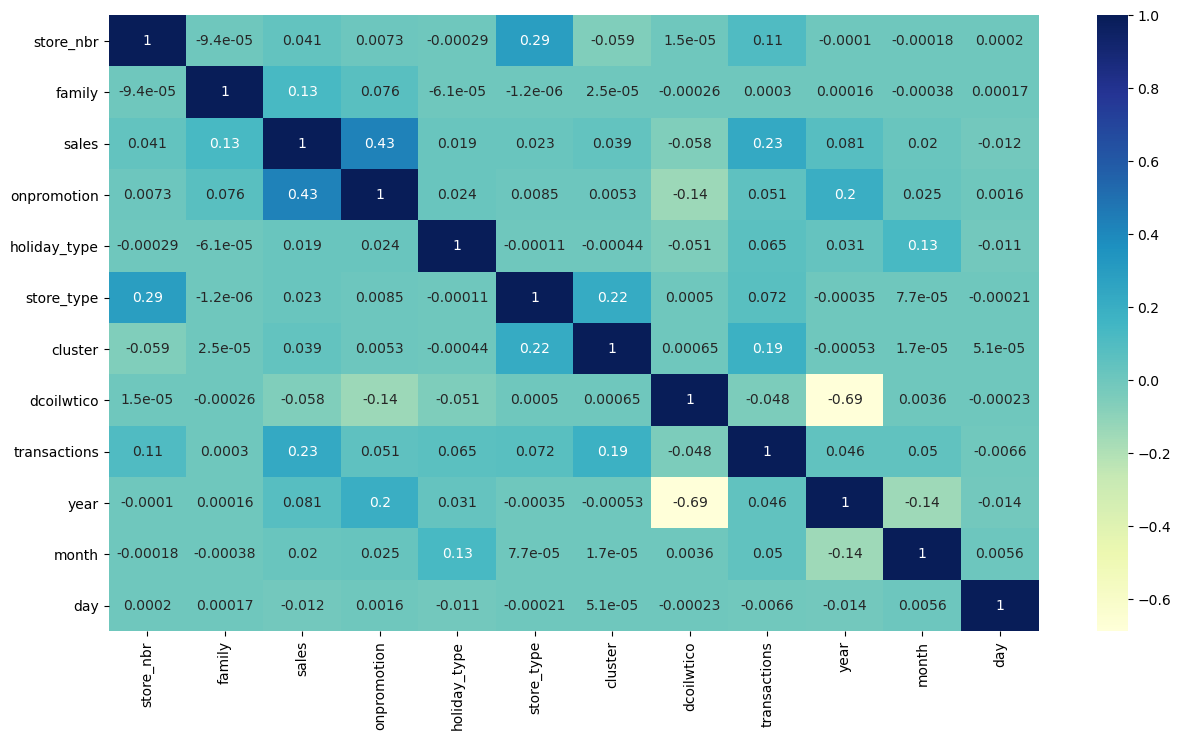

In [ ]:
## Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 8))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Inference:** We can observe sales and onpromotion are having positive correlation with coefficient 0.43 and then sales and transaction having correlation coefficient 0.23

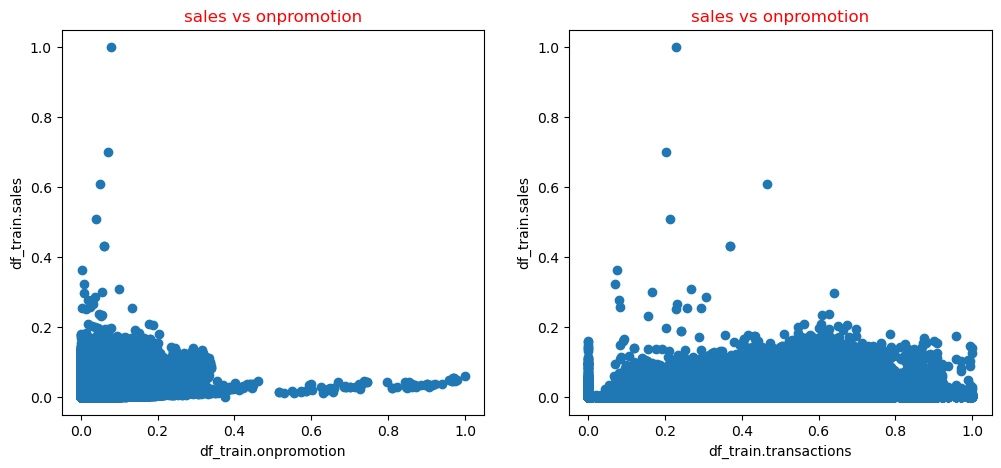

In [ ]:
# plot graph between sales and onpromotion variable
plt.figure(figsize=[12,5])


plt.subplot(1,2,1)
plt.scatter(df_train.onpromotion, df_train.sales)
plt.title('sales vs onpromotion', fontdict={'fontsize':12, 'color':'red'})
plt.xlabel('df_train.onpromotion')
plt.ylabel('df_train.sales')

# plot graph between sales and transactions variable
plt.subplot(1,2,2)
plt.scatter(df_train.transactions, df_train.sales)
plt.title('sales vs transactions', fontdict={'fontsize':12, 'color':'red'})
plt.xlabel('df_train.transactions')
plt.ylabel('df_train.sales')
plt.show()

<h4> Dividing into X and Y sets for the model building</h4>


In [ ]:
# store the data sets except 'sales' into a new dataframe X_train
X_train = df_train[['day','month','year','store_nbr','family','onpromotion','holiday_type','store_type',
                    'cluster','dcoilwtico','transactions']]
# store the target variable 'sales' into a new varible y_train
y_train = df_train['sales']

In [ ]:
X_train

,day,month,year,store_nbr,family,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions
1175537,0.433,0.818,0.250,0.774,0.750,0.000,0.000,0.000,0.062,0.658,0.000
1279874,0.367,1.000,0.250,0.358,0.875,0.000,0.000,0.750,0.312,0.375,0.000
842280,0.433,0.273,0.250,0.755,0.594,0.000,0.167,0.000,0.188,0.922,0.119
2715015,0.300,0.091,1.000,0.698,0.031,0.000,0.000,0.000,0.188,0.327,0.162
2111901,0.600,0.182,0.750,0.283,0.938,0.000,0.000,0.250,0.125,0.495,0.098
...,...,...,...,...,...,...,...,...,...,...,...
65615,0.167,0.091,0.000,0.075,0.750,0.000,0.000,0.000,0.188,0.832,0.190
2961239,0.800,0.455,1.000,1.000,0.781,0.000,0.167,0.250,0.125,0.495,0.120
210755,0.933,0.273,0.000,0.396,0.719,0.000,0.167,0.250,0.375,0.804,0.000
1104664,0.100,0.727,0.250,0.981,0.688,0.000,0.000,0.000,0.750,0.809,0.078


In [ ]:
y_train

1175537   0.000
1279874   0.000
842280    0.000
2715015   0.000
2111901   0.000
           ... 
65615     0.001
2961239   0.000
210755    0.000
1104664   0.000
1873416   0.000
Name: sales, Length: 2443478, dtype: float64

<h4>Building a Linear Model</h4> 

- Using RFE - Backward Approach

In [ ]:
# Importing RFE 
from sklearn.feature_selection import RFE

In [ ]:
# Running RFE for automatic selection of significant variables
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
# columns that are significant (True)
col = X_train.columns[rfe.support_]
col

Index(['day', 'store_nbr', 'family', 'onpromotion', 'transactions'], dtype='object')

### Building model using statsmodel, for the detailed statistics

Fit a regression line through the training data using **`statsmodels`**.Remember that in **`statsmodels`**, we need to explicitly fit a constant using **`sm.add_constant(X)`** because if we don't perform this step, **`statsmodels`** fits a regression line passing through the origin, by default.

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

# summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                 1.529e+05
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:20:08   Log-Likelihood:             8.4111e+06
No. Observations:             2443478   AIC:                        -1.682e+07
Df Residuals:                 2443472   BIC:                        -1.682e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0023   1.66e-05   -138.499   

##### Check for the VIF values of the feature variables. 

In [ ]:
#import library for vif calculation 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop the constant before vif calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Create a dataframe that will contain the names of all the feature variables (RFE) and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,store_nbr,3.100
2,family,2.890
0,day,2.840
4,transactions,2.790
3,onpromotion,1.050


**_We generally want a VIF that is `less than 5` and p-value `less than 0.05`_**

**Inferences:**

- In the summary of model, we observed that p-values of all the features is significant i.e. `less than 0.05` and their corresponding VIFs are also significant i.e. `less than 5`.


- Here, we are good with `number of features`, `p-values`, `VIFs` of all the `5` significant features that we obtained in this model.


- So, we will consider this model as **`final model`** and now predict the test data. 


<h3><font color=red><u>Report the conclusion of train data </u> :</font> </h3>


- #### Final Model : lm
- #### R square : 0.238
- #### Adj R Square : 0.238

### Residual Analysis of the train data

To check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
# Predicted y_train data
# X_train_rfe.reset_index(drop=True,inplace=True)

# y_train_pred = lm.predict(X_test[col])
# y_train_pred
X_train_rfe_smm = sm.add_constant(X_train[col])
# X_train_rfe.reset_index(drop=True,inplace=True)
# X_train_rfe.shape
y_train_pred = lm.predict(X_train_rfe_smm)

In [ ]:
y_train_pred

1175537    0.000
1279874    0.000
842280     0.002
2715015    0.000
2111901    0.002
           ...  
65615      0.003
2961239    0.002
210755    -0.000
1104664    0.001
1873416    0.002
Length: 2443478, dtype: float64

#### Check the assumption of Linear Regression

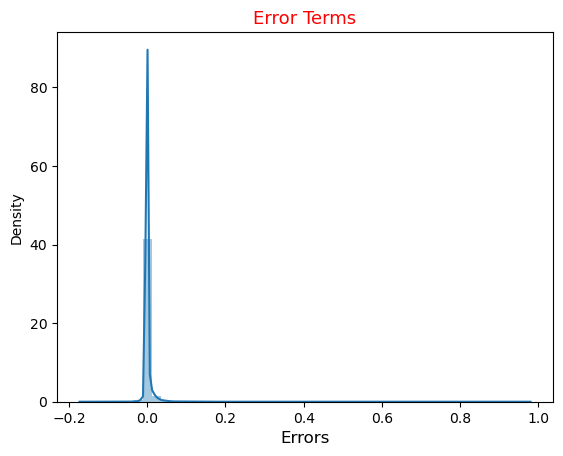

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()

#find error terms/residuals ( yi - y_pred)
res = y_train - y_train_pred

# plot distribution graph
sns.distplot(res)
plt.title('Error Terms', fontdict={'fontsize' : 13, 'color':'red'})   
plt.xlabel('Errors', fontsize = 12)                         
plt.show()

<AxesSubplot:xlabel='sales'>

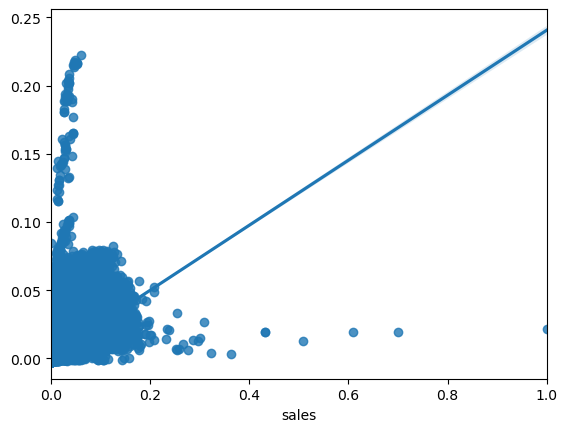

In [ ]:
sns.regplot(y_train,y_train_pred,fit_reg= True)

In [ ]:
#evaluation metrics calculation
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
LR_r2_score_train = r2_score(y_train,y_train_pred)
LR_rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
LR_mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
print(LR_r2_score_train,LR_rmse_train,LR_mape_train)


0.23836625216844498 0.007741018514866654 2614516399003.291


**Lets see Residuals are having any patterns or not**

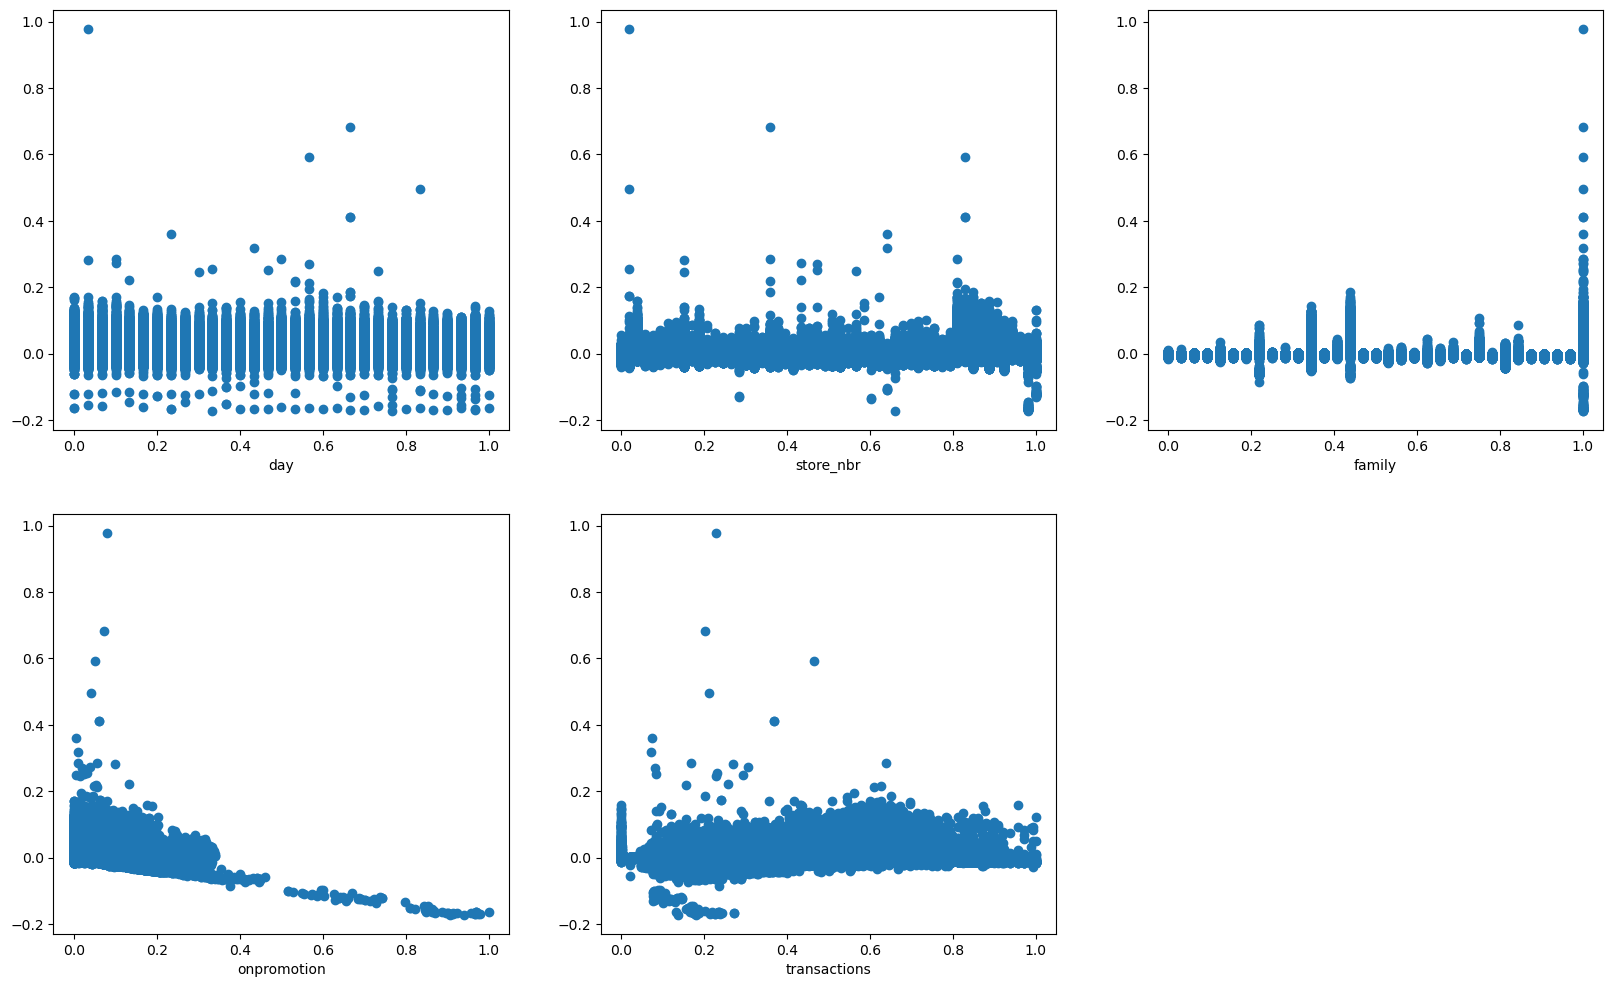

In [ ]:
# import math library

import math

# plot scatter plots of significant variables wrt residuals
plt.figure(figsize = (20,12))

# stored the significant varibles obtained in model in a new variable 'cols'
cols = X_train_rfe.columns

for row in enumerate(cols):    
    plt.subplot(math.ceil(len(cols)/3),3,row[0]+1)
    plt.scatter(X_train_rfe[row[1]],res)
    plt.xlabel(row[1])
    
plt.show()

**Inference**: `Residuals` are scattered for all data points between 0 to 1

### Predictions and Evaluation on the Test Set using Final Model


Till now, we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets :


- Since, we do not fit scaling for `test set`; we can only apply scaling using `min-max` fit of train data

In [ ]:
df_test.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'holiday_type',
       'store_type', 'cluster', 'dcoilwtico', 'transactions', 'year', 'month',
       'day'],
      dtype='object')

In [ ]:
df_test = df_test.drop('date',axis = 1)

In [ ]:
#create a list of numerical variables
num_vars = ['store_nbr', 'family', 'sales', 'onpromotion', 'holiday_type',
       'store_type', 'cluster', 'dcoilwtico', 'transactions', 'year', 'month',
       'day']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])

#checking top rows of the data frame
df_test.head()

,store_nbr,family,sales,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions,year,month,day
20013,0.358,0.000,0.000,0.000,0.833,0.750,0.312,0.495,0.000,0.000,0.000,0.367
241272,0.528,0.531,0.000,0.000,0.000,1.000,0.562,0.803,0.000,0.000,0.364,0.467
1805492,0.321,0.250,0.000,0.001,0.000,0.750,0.938,0.226,0.156,0.500,0.727,0.933
993560,0.660,0.250,0.000,0.000,0.333,1.000,0.562,0.495,0.113,0.250,0.545,0.100
214572,0.038,0.031,0.000,0.000,0.167,0.000,0.438,0.765,0.410,0.000,0.364,0.000


In [ ]:
#check summary of test data
df_test.describe()

,store_nbr,family,sales,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions,year,month,day
count,610870.000,610870.000,610870.000,610870.000,610870.000,610870.000,610870.000,610870.000,610870.000,610870.000,610870.000,610870.000
mean,0.500,0.500,0.003,0.004,0.046,0.338,0.467,0.496,0.186,0.460,0.475,0.489
std,0.294,0.298,0.009,0.016,0.126,0.320,0.291,0.252,0.124,0.336,0.307,0.293
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.245,0.250,0.000,0.000,0.000,0.000,0.188,0.271,0.111,0.250,0.182,0.233
50%,0.509,0.500,0.000,0.000,0.000,0.250,0.438,0.495,0.159,0.500,0.455,0.500
75%,0.755,0.750,0.002,0.000,0.000,0.500,0.750,0.774,0.237,0.750,0.727,0.733
max,1.000,1.000,0.718,0.947,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


#### Dividing into X_test and y_test

In [ ]:
X_test = df_test[['day','month','year','store_nbr','family','onpromotion','holiday_type','store_type','cluster','dcoilwtico','transactions']]
# store the target variable 'sales' into a new varible y_test
y_test = df_test['sales']

In [ ]:
#check top 5 rows
X_test.head()

,day,month,year,store_nbr,family,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions
20013,0.367,0.000,0.000,0.358,0.000,0.000,0.833,0.750,0.312,0.495,0.000
241272,0.467,0.364,0.000,0.528,0.531,0.000,0.000,1.000,0.562,0.803,0.000
1805492,0.933,0.727,0.500,0.321,0.250,0.001,0.000,0.750,0.938,0.226,0.156
993560,0.100,0.545,0.250,0.660,0.250,0.000,0.333,1.000,0.562,0.495,0.113
214572,0.000,0.364,0.000,0.038,0.031,0.000,0.167,0.000,0.438,0.765,0.410


In [ ]:
#check top 5 rows
y_test.head()

20013     0.000
241272    0.000
1805492   0.000
993560    0.000
214572    0.000
Name: sales, dtype: float64

In [ ]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,day,month,year,store_nbr,family,onpromotion,holiday_type,store_type,cluster,dcoilwtico,transactions
20013,1.000,0.367,0.000,0.000,0.358,0.000,0.000,0.833,0.750,0.312,0.495,0.000
241272,1.000,0.467,0.364,0.000,0.528,0.531,0.000,0.000,1.000,0.562,0.803,0.000
1805492,1.000,0.933,0.727,0.500,0.321,0.250,0.001,0.000,0.750,0.938,0.226,0.156
993560,1.000,0.100,0.545,0.250,0.660,0.250,0.000,0.333,1.000,0.562,0.495,0.113
214572,1.000,0.000,0.364,0.000,0.038,0.031,0.000,0.167,0.000,0.438,0.765,0.410


In [ ]:
# Select only those variables which are present in final model
X_test_sm = X_test_sm[X_train_rfe.columns]
#checking top rows of test dataframe
X_test_sm.head()

,day,store_nbr,family,onpromotion,transactions
20013,0.367,0.358,0.000,0.000,0.000
241272,0.467,0.528,0.531,0.000,0.000
1805492,0.933,0.321,0.250,0.001,0.156
993560,0.100,0.660,0.250,0.000,0.113
214572,0.000,0.038,0.031,0.000,0.410


In [ ]:
# add constant to test dataset
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,day,store_nbr,family,onpromotion,transactions
20013,1.000,0.367,0.358,0.000,0.000,0.000
241272,1.000,0.467,0.528,0.531,0.000,0.000
1805492,1.000,0.933,0.321,0.250,0.001,0.156
993560,1.000,0.100,0.660,0.250,0.000,0.113
214572,1.000,0.000,0.038,0.031,0.000,0.410


In [ ]:
# Making predictions using the linear model 
y_test_pred = lm.predict(X_test_sm)

#checking top rows of predicted test dataframe
y_test_pred.head()

20013     -0.002
241272    -0.001
1805492    0.001
993560     0.000
214572     0.004
dtype: float64

#### - Checked the R-square, RMSE and MAPE for test data




In [ ]:
LR_r2_score_test = r2_score(y_test,y_test_pred)
LR_rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
LR_mape_test = mean_absolute_percentage_error(y_test,y_test_pred)

#### - Checked the adjusted R square for test data

In [ ]:
# Adjusted R square for test data

#print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))) 

r2_adj = 1- (((1-00.23416427865050804)*(1-len(y_test_pred)))/(1-10-len(y_test_pred)))
r2_adj

0.23417681526940226

### Model Evaluation

Let's now plot the graph for actual versus predicted values where :
- `y_test` is the test data set for the target variable, and


- `y_test_pred` is the variable containing the predicted values of the target variable on the test set.


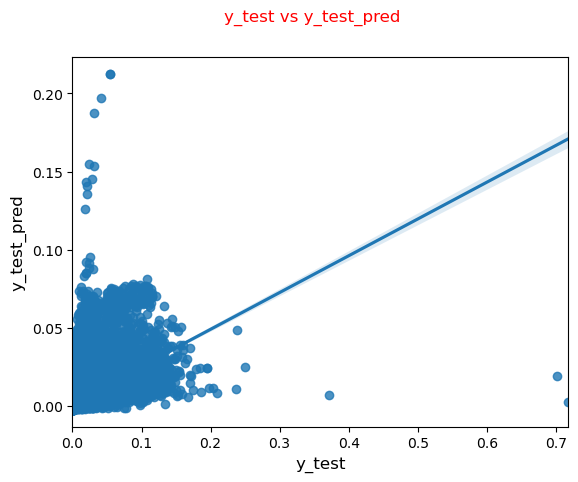

In [ ]:
# Plotting regression plot for y_test and y_test_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontdict={'fontsize' : 13, 'color':'red'})               
plt.xlabel('y_test', fontsize = 12)                                                           
plt.ylabel('y_test_pred', fontsize = 12)                                                      
plt.show() 

**Inference:** As we can see in the above model, large no. of data points are around regression line but few of them are far from the regression . So, we cant comment much on the error in our final model. So, this is not the best fitted regression line and hence not a significant linear regression model.

In [ ]:
# Metrics to give an overall sense of error in the model
from sklearn.metrics import mean_absolute_percentage_error

Model_Metrics = pd.DataFrame({"Algo_Name": ["Linear Regression"],"r2-Score Train":[LR_r2_score_train],"r2-Score Test":[LR_r2_score_test], 
                              "RMSE Train": [LR_rmse_train],"RMSE Test": [LR_rmse_test],"MAPE Train": [LR_mape_train],"MAPE Test" : [LR_mape_test]})
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266


<h3><font color=red><u>Report the result of train and test data </u> :</font> </h3>


**Train Data-** R-square:  0.238 and Adjusted R-square:  0.238  


**Test Data-** R-square: 0.259 and Adjusted R-square:  0.234





_**Note:** Ideal value of R square for test data should lies between : 78% - 85 %. But we obtained given values. Hence, this is not a good model._

#### Generalised Equation of linear regression :

y = c + m1x1 + m2x2 + m3x3 + .......+ mnxn

$ LM = -0.0023 -(0.0003 \times day) + (0.0005 \times store_nbr) + (0.0031\times family) + (0.2183 \times onpromotion) + (0.0151 \times transactions) $

## 2. Random Forest

<h3>Training the Algorithm</h3>

In [ ]:
#imported library
from sklearn.ensemble import RandomForestRegressor

# n_estimators parameter defines the number of trees in the random forest.
RFR = RandomForestRegressor(n_estimators=20, random_state=0)
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

In [ ]:
RFR.score(X_test,y_test)

0.9490530956444433

In [ ]:
r2_score(y_test,y_pred)

0.9490530956444433

In [ ]:
y_train_pred = RFR.predict(X_train)
r2_score(y_train,y_train_pred)

0.9927846232536686

<h3>Evaluating the Algorithm</h3>

In [ ]:
# evaluation metrics
from sklearn import metrics
RF_r2_score_train = r2_score(y_train,y_train_pred)
RF_rmse_train = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
RF_mape_train = metrics.mean_absolute_percentage_error(y_train,y_train_pred)


RF_r2_score_test = r2_score(y_test,y_pred)
RF_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RF_mape_test = metrics.mean_absolute_percentage_error(y_test, y_pred)

Temp_Model_Metrics = pd.DataFrame({"Algo_Name": ["Random Forest"],"r2-Score Train":[RF_r2_score_train],"r2-Score Test":[RF_r2_score_test], 
                              "RMSE Train": [RF_rmse_train],"RMSE Test": [RF_rmse_test],"MAPE Train": [RF_mape_train],"MAPE Test" : [RF_mape_test]})
Model_Metrics = pd.concat([Model_Metrics,Temp_Model_Metrics])
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711


## 3.  XGBoost Algorithm

In [ ]:
! pip install xgboost
# imported library
import xgboost as xgb


Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 173.6 MB 6.0 kB/s              


In [ ]:
#initialized XGBoost
model = xgb.XGBRegressor()

In [ ]:
#model fitting
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

In [ ]:
y_pred_xgb

array([-7.5779360e-05,  3.5651034e-04,  1.5986265e-03, ...,
        7.5785530e-04,  5.4470805e-04,  2.2639849e-03], dtype=float32)

<h3>Evaluating the Algorithm</h3>

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
r2_score(y_test,y_pred_xgb)

0.9173794054308579

In [ ]:
y_train_pred_xgb = model.predict(X_train)

In [ ]:
r2_score(y_train,y_train_pred_xgb)

0.9366495079748732

In [ ]:
XGB_r2_score_train = r2_score(y_train,y_train_pred_xgb)
XGB_rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred_xgb))
XGB_mape_train = mean_absolute_percentage_error(y_train,y_train_pred_xgb)

XGB_r2_score_test = r2_score(y_test,y_pred_xgb)
XGB_rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
XGB_mape_test = mean_absolute_percentage_error(y_test,y_pred_xgb)

Temp_Model_Metrics = pd.DataFrame({"Algo_Name": ["XG Boost"],"r2-Score Train":[XGB_r2_score_train],"r2-Score Test":[XGB_r2_score_test], 
                              "RMSE Train": [XGB_rmse_train],"RMSE Test": [XGB_rmse_test],"MAPE Train": [XGB_mape_train],"MAPE Test" : [XGB_mape_test]})
Model_Metrics = pd.concat([Model_Metrics,Temp_Model_Metrics])
Model_Metrics


,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706


## 4. Long Short-Term Memory (LSTM) algorithm




In [ ]:
# imported all the required libraries
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])

In [ ]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss=['mean_squared_error'], optimizer='adam')
model.fit(X_train, y_train, epochs=2, batch_size=1, verbose=1, shuffle=False)

Epoch 1/2
2443478/2443478 [==============================] - 2270s 929us/step - loss: 5.8699e-05
Epoch 2/2
2443478/2443478 [==============================] - 2262s 926us/step - loss: 4.6663e-05


In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_test_pred = model.predict(X_test)

ValueError: in user code:

    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1457 predict_function  *
        return step_function(self, iterator)
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1447 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1440 run_step  **
        outputs = model.predict_step(data)
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1413 predict_step
        return self(x, training=False)
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 11]


In [ ]:
LSTM_r2_score_train = r2_score(y_train,y_train_pred)
LSTM_rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
LSTM_mape_train = mean_absolute_percentage_error(y_train,y_train_pred)

LSTM_r2_score_test = r2_score(y_test,y_test_pred)
LSTM_rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
LSTM_mape_test = mean_absolute_percentage_error(y_test,y_test_pred)

Temp_Model_Metrics = pd.DataFrame({"Algo_Name": ["XG Boost"],"r2-Score Train":[LSTM_r2_score_train],"r2-Score Test":[LSTM_r2_score_test], 
                              "RMSE Train": [LSTM_rmse_train],"RMSE Test": [LSTM_rmse_test],"MAPE Train": [LSTM_mape_train],"MAPE Test" : [LSTM_mape_test]})
Model_Metrics = pd.concat([Model_Metrics,Temp_Model_Metrics])
Model_Metrics

# 5. Time Series Forecasting Models

In [ ]:
# created a separate dataframe that stores date and sales column only
ts_data = final_data[["date","sales"]]

In [ ]:
# created a column months
ts_data["Months"] = ts_data["date"].to_numpy().astype('datetime64[M]')
ts_data

,date,sales,Months
0,2013-01-01,0.000,2013-01-01
1,2013-01-01,0.000,2013-01-01
2,2013-01-01,0.000,2013-01-01
3,2013-01-01,0.000,2013-01-01
4,2013-01-01,0.000,2013-01-01
...,...,...,...
3054343,2017-08-15,438.133,2017-08-01
3054344,2017-08-15,154.553,2017-08-01
3054345,2017-08-15,2419.729,2017-08-01
3054346,2017-08-15,121.000,2017-08-01


In [ ]:
# dropped column date because we will do month wise analysis
ts_data.drop("date",axis = 1, inplace=True)

In [ ]:
#set months column as index
ts_data.set_index("Months")

,sales
Months,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-08-01,438.133
2017-08-01,154.553
2017-08-01,2419.729


In [ ]:
# group by months to get month wise sales
ts_data = ts_data.groupby("Months").sum()

In [ ]:
# month wise sales from 2013-2017
ts_data

,sales
Months,
2013-01-01,10327624.737
2013-02-01,9658959.777
2013-03-01,11428497.037
2013-04-01,10993464.738
2013-05-01,11985564.512
2013-06-01,12299583.122
2013-07-01,11631952.526
2013-08-01,11737788.919
2013-09-01,11792933.232


### Time Series Analysis



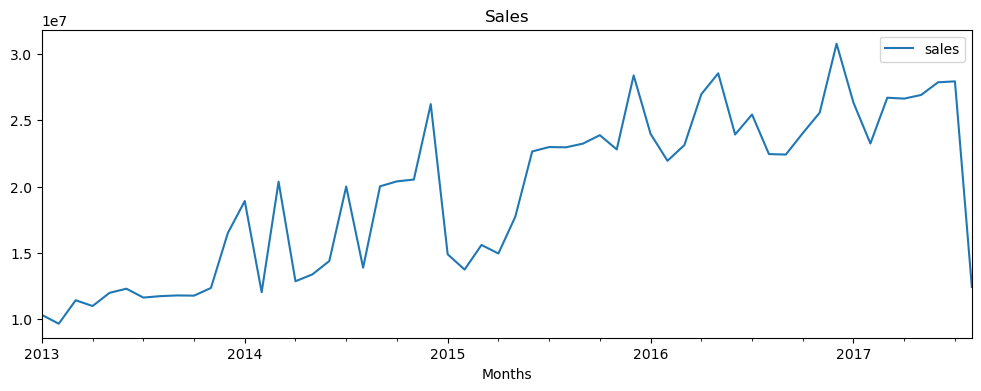

In [ ]:
# Plot time series data
ts_data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=True)  

### Time series Decomposition

#### - Additive seasonal decomposition

In [ ]:
from pylab import rcParams      # imported all the required libraries
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8     #set figure size

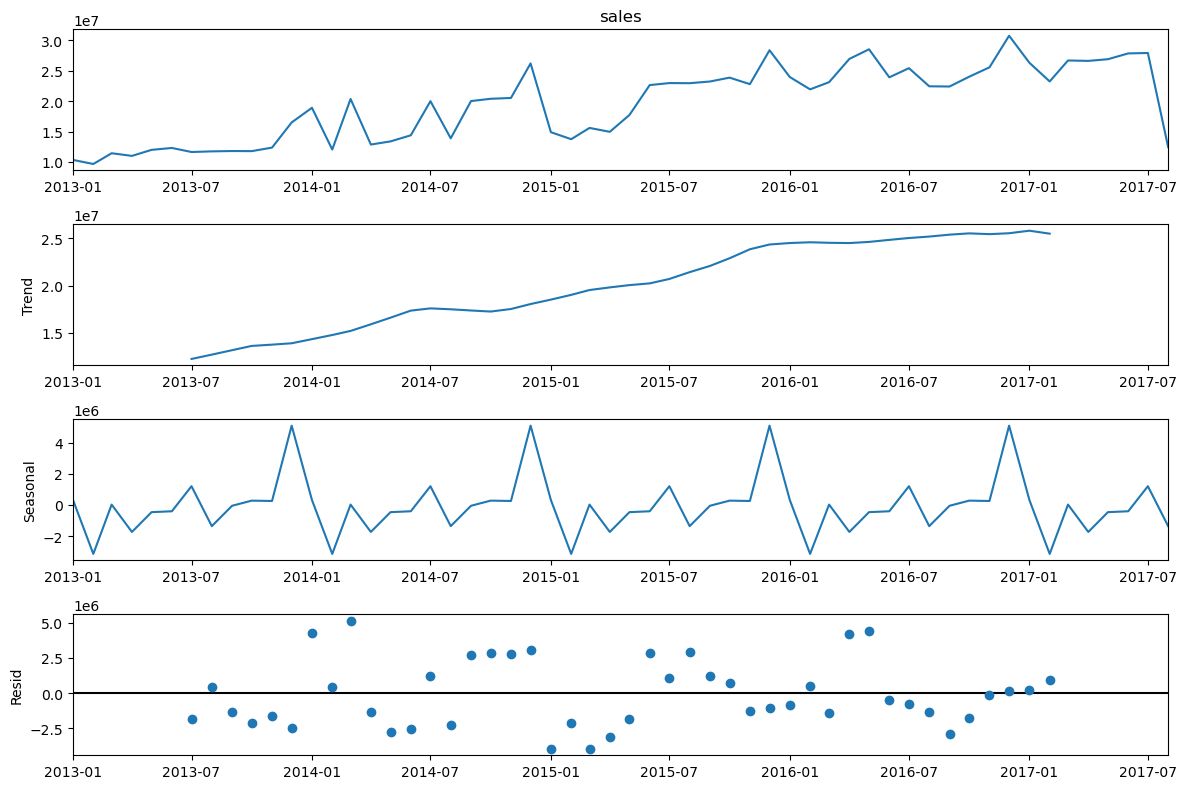

In [ ]:
# additive seasonal index
decomposition = sm.tsa.seasonal_decompose(ts_data.sales, model='additive') 
fig = decomposition.plot()
plt.show()

#### - Multiplicative seasonal decomposition


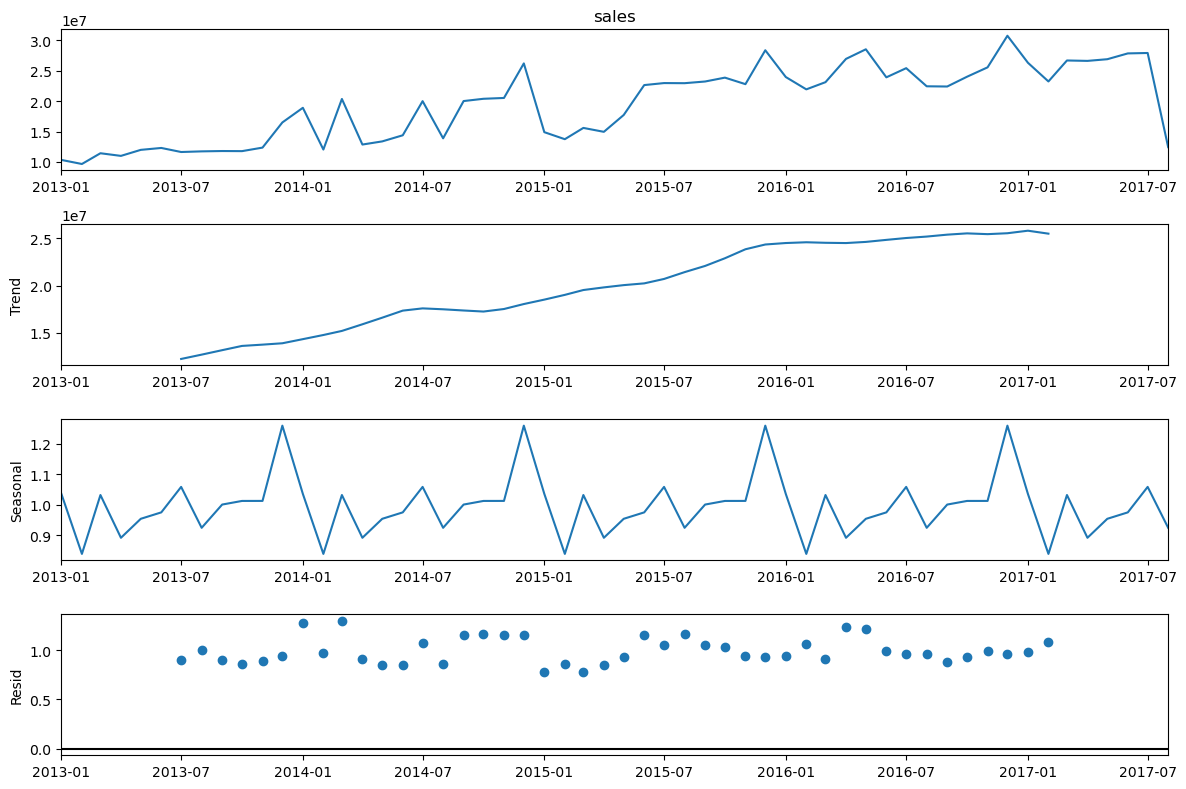

In [ ]:
# multiplicative seasonal index
decomposition = sm.tsa.seasonal_decompose(ts_data.sales, model='multiplicative') 
fig = decomposition.plot()
plt.show()

## Build and evaluate time series forecast models


### Split time series data into training and test set

In [ ]:
#checking dimension of time series data  
ts_data.shape

(56, 1)

In [ ]:
# train-test split
train_len = 48
train = ts_data[0:train_len] # first 48 months as training set
test = ts_data[train_len:] # last 8 months as out-of-time test set

## Simple time series methods

### i). Naive method

In [ ]:
y_hat_naive = test.copy()  # created a copy of the test data
y_hat_naive['naive_forecast'] = train['sales'][train_len-1]

#### Plot train, test and forecast

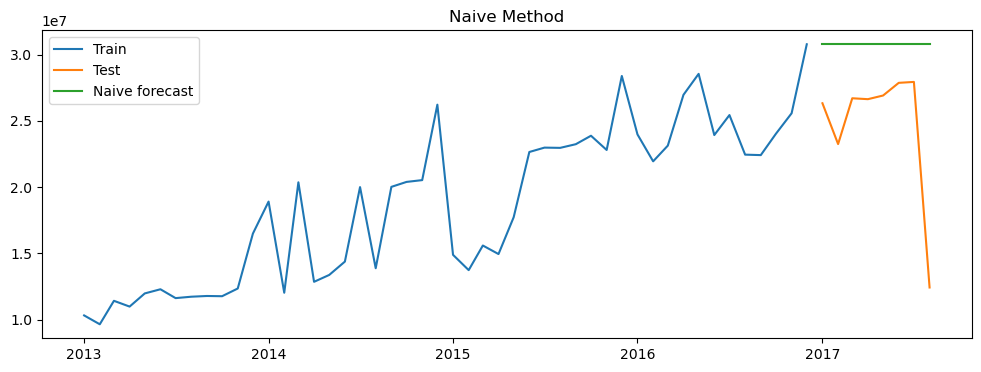

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### Calculate RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['sales']-y_hat_naive['naive_forecast'])/test['sales'])*100,2)
r2score = r2_score(test['sales'], y_hat_naive['naive_forecast'])
results = pd.DataFrame({'Method':['Naive method'], 'Test_MAPE': [mape], 'Test_RMSE': [rmse], 'Test_r2score' : [r2score]})
# results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,Test_MAPE,Test_RMSE,Test_r2score
0,Naive method,32.820,7730283.100,-1.538


### ii). Simple average method

In [ ]:
y_hat_avg = test.copy() # created a copy of the test data
y_hat_avg['avg_forecast'] = train['sales'].mean() #calculating sales mean 

#### Plot train, test and forecast

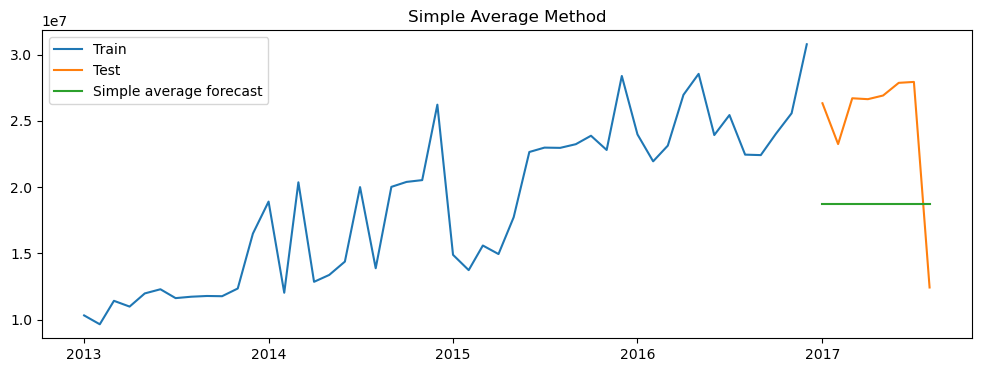

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['sales']-y_hat_avg['avg_forecast'])/test['sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,nan,nan
0,Simple average method,7747467.960,31.860


### iii). Simple moving average method

In [ ]:
y_hat_sma = ts_data.copy() # created a separate copy of the entire data
ma_window = 1  #define window size
y_hat_sma['sma_forecast'] = ts_data['sales'].rolling(ma_window).mean()  #calculate moving average
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

#### Plot train, test and forecast

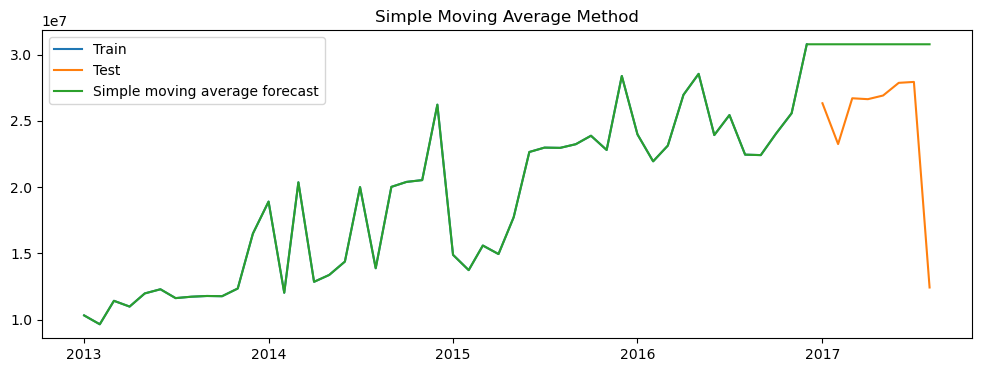

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### Calculate RMSE and MAPE

In [ ]:
r2score_train = r2_score(train['sales'],y_hat_sma['sma_forecast'][:train_len])
rmse_train = np.sqrt(mean_squared_error(train['sales'], y_hat_sma['sma_forecast'][:train_len])).round(2)
mape_train = np.round(np.mean(np.abs(train['sales']-y_hat_sma['sma_forecast'][:train_len])/train['sales'])*100,2)

r2score_test = r2_score(test['sales'],y_hat_sma['sma_forecast'][train_len:])
rmse_test = np.sqrt(mean_squared_error(test['sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape_test = np.round(np.mean(np.abs(test['sales']-y_hat_sma['sma_forecast'][train_len:])/test['sales'])*100,2)

Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['Simple moving average forecast'], "r2-Score Train":[r2score_train],"r2-Score Test":[r2score_test], 
                              "RMSE Train": [rmse_train],"RMSE Test": [rmse_test],"MAPE Train": [mape_train],"MAPE Test" : [mape_test]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])

Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820


## Exponential smoothing methods

### i). Simple exponential smoothing


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing    #imported libraries
model = SimpleExpSmoothing(train['sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(8)
y_pred_train = model_fit.predict(0,47)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
y_hat_ses_train = model_fit.forecast?

In [ ]:
y_hat_ses_train = model_fit.forecast

In [ ]:
y_hat_ses_train = model_fit.forecast

#### Plot train, test and forecast


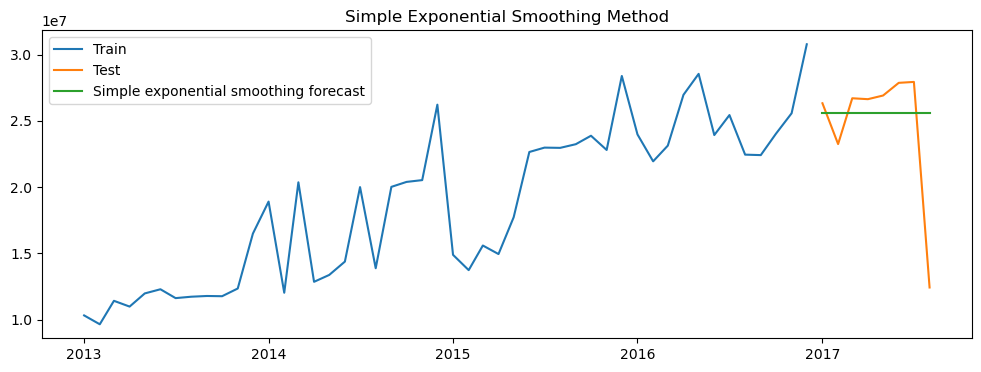

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

#### Calculate R2, RMSE and MAPE

In [ ]:
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_pred_train )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_pred_train)
train_r2_score = r2_score(train['sales'], y_pred_train)


test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_ses['ses_forecast'])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_ses['ses_forecast'])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_ses['ses_forecast'])
Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['Simple exponential smoothing forecast'],'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train': [train_mape] ,'MAPE Test':[test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570


## Holt's Exponential Smoothing

### i). Holt's method with trend

In [ ]:
#imported libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
#model fit
model = ExponentialSmoothing(np.asarray(train['sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))
y_pred_train = model_fit.predict(0,47)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 10327624.736909438, 'initial_trend': -668664.9594726134, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


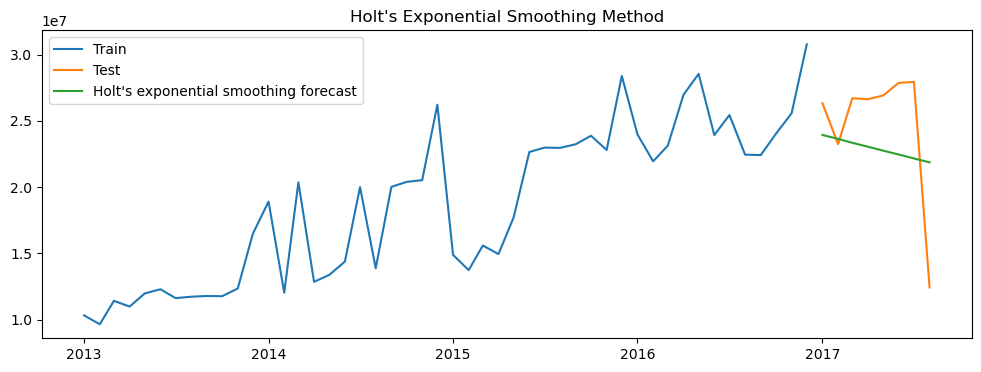

In [ ]:
#### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [ ]:
#### Calculate R2, RMSE and MAPE
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_pred_train )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_pred_train)
train_r2_score = r2_score(train['sales'], y_pred_train)


rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['sales']-y_hat_holt['holt_forecast'])/test['sales'])*100,2)
r2_score_test = r2_score(test['sales'], y_hat_holt['holt_forecast'])

temp_Model_Metrics = pd.DataFrame({'Algo_Name':['Holt\'s exponential smoothing method'], 'r2-Score Train':[train_r2_score],'r2-Score Test':[r2_score_test],'RMSE Train': [train_rmse],'RMSE Test': [rmse],'MAPE Train': [train_mape] ,'MAPE Test':[mape]})
Model_Metrics = pd.concat([Model_Metrics, temp_Model_Metrics])
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020


## Holt-Winters's Exponential Smoothing

### i). Holt Winters' additive method with trend and seasonality





In [ ]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(8)
train_pred = model_fit.predict(0,47)

{'smoothing_level': 0.3585714285714286, 'smoothing_trend': 0.021092436974789918, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 17028498.095236387, 'initial_trend': 489697.21853906754, 'initial_seasons': array([-6700873.35832695, -7369538.31779956, -5600001.05774889,
       -6035033.3572246 , -5042933.58319511, -4728914.97286481,
       -5396545.56960658, -5290709.1757637 , -5235564.86336851,
       -5252877.73471729, -4671938.8022503 ,  -529085.80039479]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


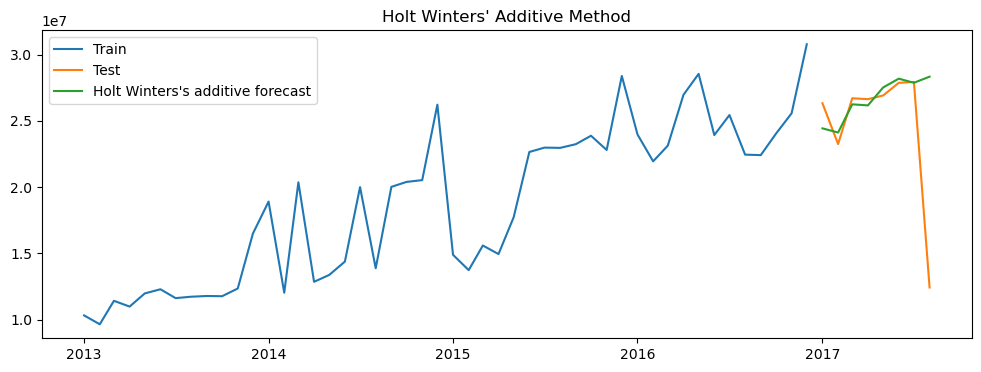

In [ ]:
#### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [ ]:
#### Calculate R2, RMSE and MAPE
train_rmse = np.sqrt(mean_squared_error(train['sales'],train_pred )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], train_pred)
train_r2_score = r2_score(train['sales'], train_pred)

test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_hwa['hw_forecast'])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_hwa['hw_forecast'])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_hwa['hw_forecast'])
Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['Holt Winters\' Additive method'], 'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape] })
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240


### ii). Holt Winter's multiplicative method with trend and seasonality

In [ ]:
## model fitting
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(8)
y_pred_train = model_fit.predict(0,47)

{'smoothing_level': 0.3585714285714286, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.027888198757763976, 'damping_trend': nan, 'initial_level': 17028498.095236387, 'initial_trend': 489697.21853906754, 'initial_seasons': array([0.60649064, 0.56722324, 0.67113946, 0.64559215, 0.7038533 ,
       0.72229407, 0.6830874 , 0.68930265, 0.69254101, 0.69152431,
       0.72564   , 0.96892939]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


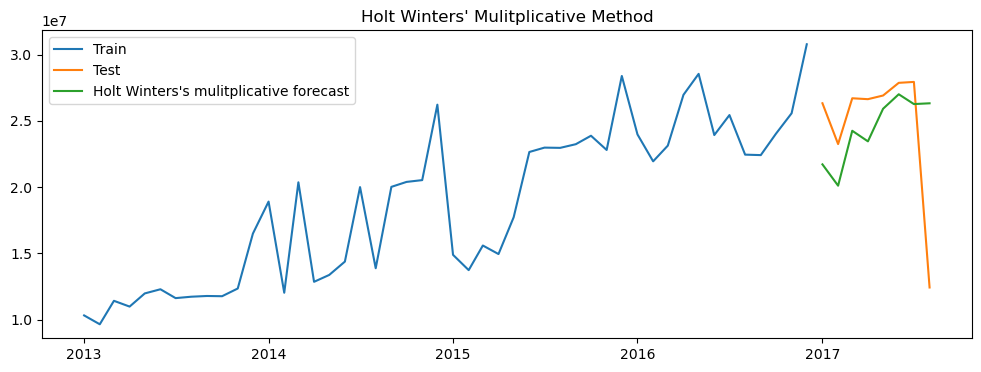

In [ ]:
#### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [ ]:
#### Calculate R2, RMSE and MAPE
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_pred_train )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_pred_train)
train_r2_score = r2_score(train['sales'], y_pred_train)

test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_hwm['hw_forecast'])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_hwm['hw_forecast'])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_hwm['hw_forecast'])

Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['Holt Winters\' multiplicative method'], 'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])

Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240
0,Holt Winters' multiplicative method,0.777,-0.299,2747599.780,5530998.830,0.119,22.080


## Autoregressive Models



**As we know there are two fundamental requirements to build an autoregressive model i.e. stationarity and autocorrelation. So, we first confirm these pre-requisites before building autoregressive models**

### 1. Stationarity 


#### Time-Series plot

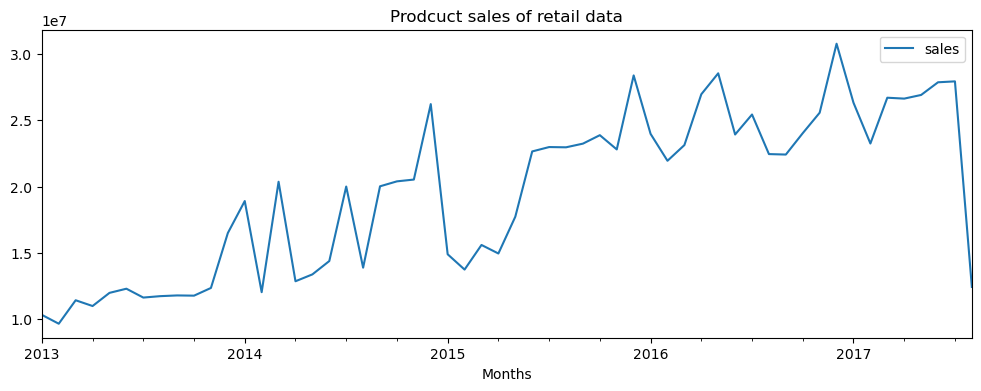

In [ ]:
# Plot time series data
ts_data['sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Prodcuct sales of retail data')
plt.show(block=True)  

## Stationary vs Non-Stationary time series

### I. Stationarity Tests: 

Unit root test is a common procedure to determine whether a time series is stationary or not. 

### i. Augmented Dickey-Fuller (ADF) Test 

- **Null Hypothesis (H0):** The series is not stationary
   
    p_value>0.05

- **Alternate Hypothesis (H1):** The series is stationary

    p_value<=0.05

In [ ]:
from statsmodels.tsa.stattools import adfuller #imported libraries
adf_test = adfuller(ts_data['sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%']) #define critical value of 5%
print('p-value: %f' % adf_test[1]) #p-value

ADF Statistic: -2.208327
Critical value @ 0.05: -2.92
p-value: 0.203237


**Inference:** Here we can see that the p-value > 0.05 and ADF is also greater than its critical value that means data is non-stationary i.e. time series data have a trend and seasonal component. So we accept the null hypothesis or fail to reject the null hypothesis. Hence, we need to convert it to stationary time series data.

### ii. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

- **Null Hypothesis (H0):** The series is stationary
   
    p_value>0.05

- **Alternate Hypothesis (H1):** The series is not stationary

    p_value<=0.05

In [ ]:
from statsmodels.tsa.stattools import kpss #imported libraries
kpss_test = kpss(ts_data['sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%']) #define critical value of 5%
print('p-value: %f' % kpss_test[1]) #p-value

KPSS Statistic: 0.541466
Critical value @ 0.05: 0.46
p-value: 0.032328


**Inferences:** Here we can see that the p-value < 0.05 and KPSS is also greater than its critical value that means data is non-stationary i.e. time series data have a trend and seasonal component. So we reject the null hypothesis. Hence, we need to convert it to stationary time series data.

### II. Conversion of Non-Stationary to Stationary 

_Convert a non-stationary series into a stationary series to build an Auto Regressive model._

Two tools to convert a non-stationary series into stationary series are:

**1. Differencing:** To remove the trend (to make the mean constant) in a time series.

**2. Transformation:** To make the variance constant. 

_Here, we will consider **Box-Cox transformation**_

#### i. Box-Cox transformation

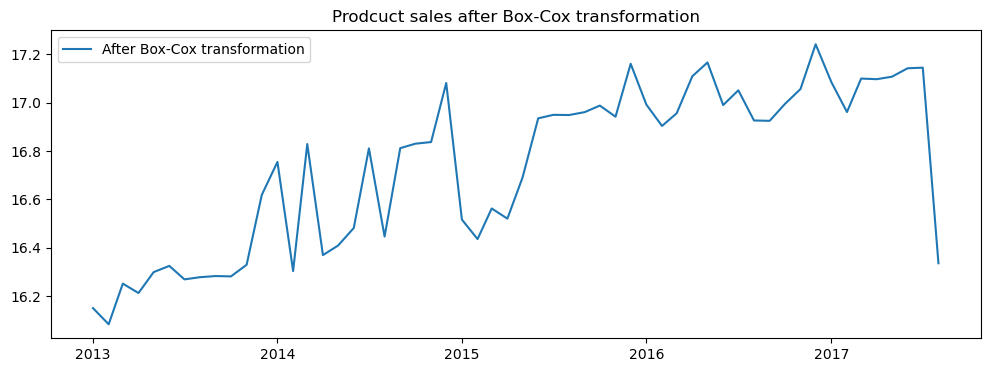

In [ ]:
from scipy.stats import boxcox
ts_data_boxcox = pd.Series(boxcox(ts_data['sales'], lmbda=0), index=ts_data.index)

plt.figure(figsize=(12,4))
plt.plot(ts_data_boxcox, label='After Box-Cox transformation')
plt.legend(loc='best')
plt.title('Prodcuct sales after Box-Cox transformation')
plt.show() 

**Inference:**Here we clearly see after the Box-Cox transformation the variance has become more or less constant or stabilised but still has a trend. Again, this trend can be removed by differencing.

#### ii. Differencing

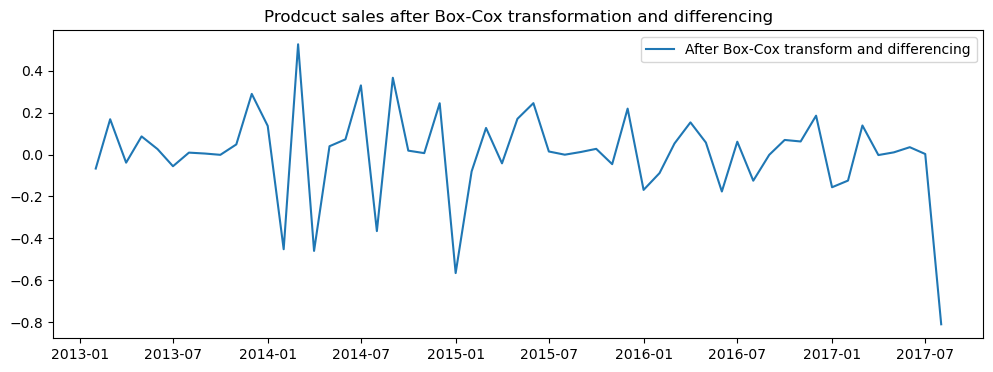

In [ ]:
ts_data_boxcox_diff = pd.Series(ts_data_boxcox - ts_data_boxcox.shift(), index=ts_data.index)
ts_data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(ts_data_boxcox_diff, label='After Box-Cox transform and differencing')
plt.legend(loc='best')
plt.title('Prodcuct sales after Box-Cox transformation and differencing')
plt.show() 

Let's cross check the hypothesis after boxcox transformation and differencing by unit testing as we did earlier

#### ADF Test

In [ ]:
adf_test = adfuller(ts_data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%']) #define critical value of 5%
print('p-value: %f' % adf_test[1]) #p-value

ADF Statistic: -4.759477
Critical value @ 0.05: -2.92
p-value: 0.000065


#### KPSS Test

In [ ]:
kpss_test = kpss(ts_data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%']) #define critical value of 5%
print('p-value: %f' % kpss_test[1]) #p-value

KPSS Statistic: 0.374375
Critical value @ 0.05: 0.46
p-value: 0.088200


**Inference:** 


- We observed in ADF test statistics that after box-cox and differencing, the p-value < 0.05 and ADF is also less than its critical value. It means now the data is stationary. So we reject the null hypothesis.


- We also observed in the KPSS test statistics that the p-value > 0.05 and KPSS is less than its critical value that means we converted a non-stationary series into a stationary series. Hence, we accept the null hypothesis or fail to reject the null hypothesis. 

## 2. Autocorrelation

It captures the relationship between observations y(t) at time t and y(t-k) at time k, time period before t. It helps us to know how a variable is influenced by its own lagged values. It captures both direct and indirect relationships between the variables.


**Two Autocorrelation measures here:**

- **Autocorrelation function (ACF):** captures both direct and indirect relationship with its lagged values.
- **Partial autocorrelation function (PACF):** captures only the direct relationship between an observation and its lagged value with the relationships of intervening observations removed.

#### i. Autocorrelation function (ACF) plot

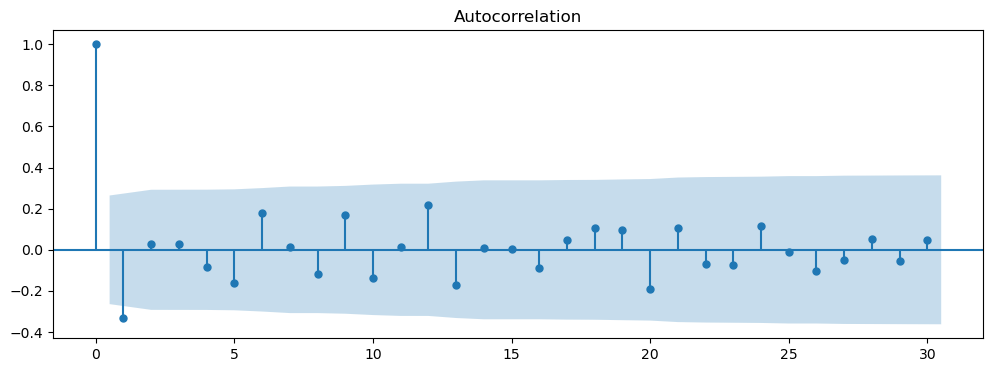

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
plot_acf(ts_data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

**Inference:** We observed in the above graph, lags which are beyond the blue area are significant rest are insignificant lags. So, here only 1 significant lag is present i.e. lag 1.

### ii. Partial autocorrelation function (PACF)

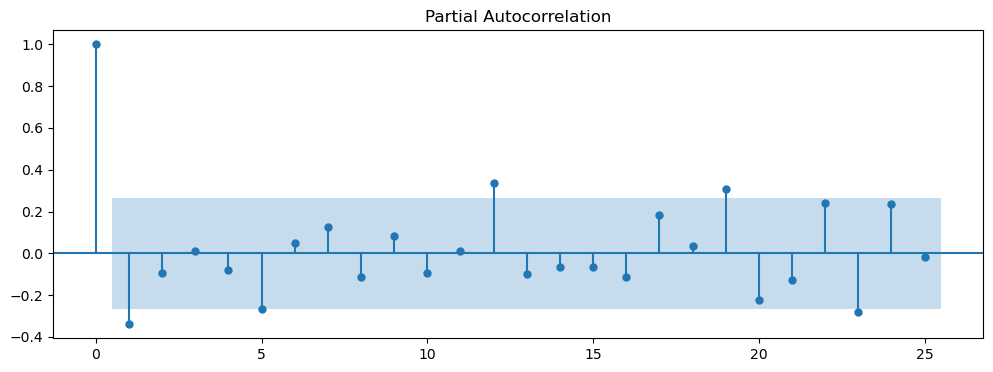

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,4))
plot_pacf(ts_data_boxcox_diff, ax=plt.gca(), lags=25)
plt.show()

**Inference:** We observed in the above graph that lags which are beyond the blue area are significant rest are insignificant lags. So, here 5 significant lags are present i.e. lag 1,5,12, 19 and 23. It is because PACF only considers the direct relationship hence has more significant lags unlike ACF which follows transitive relationship with their lags.

# **Auto Regressive Models**

**Lets build each autoregressive models one by one after checking both the requirements i.e. Stationarity and Autocorrelation.**


1. Auto Regressive (AR)
2. Moving Average (MA)
3. Auto Regressive Moving Average (ARMA)
4. Auto Regressive Integrated Moving Average (ARIMA)
5. Seasonal Auto Regressive Integrated Moving Average(SARIMA).
6. Seasonal Auto Regressive Integrated Moving Average with Exogenous variable (SARIMAX).

#### **Split into train and test data sets**

In order to build the AR model, the stationary series (both boxcox and differencing) is divided into train and test data.




In [ ]:
# stationary series (both boxcox and differencing) is divided into train and test data.
train_data_boxcox= ts_data_boxcox[:train_len]
test_data_boxcox= ts_data_boxcox[train_len:]
train_data_boxcox_diff= ts_data_boxcox_diff[:train_len-1]
train_data_boxcox= ts_data_boxcox[:train_len]
test_data_boxcox_diff= ts_data_boxcox_diff[train_len-1:]

### 1. Simple Auto Regressive Model (AR)

Predicts the future observation as linear regression of one or more past observations. It has parameter ‘p’ called lag order which is the maximum number of lags used to build ‘p’ number of past data points to predict future data points.

In [ ]:
# imported arima from the statsmodel package
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(train_data_boxcox_diff, order =(1,0,0))
model_fit = model.fit()
print(model_fit.params)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.023
ar.L1.y   -0.457
dtype: float64


#### Recover original time series forecast

Recall that we had performed boxcox transformation and differencing in order to covert the sales data into a stationary time-series. Now in order to recover the original forecast, we will have to reverse these transformations.

In [ ]:
y_hat_ar = ts_data_boxcox_diff.copy()   #create a copy of transformed data
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(ts_data_boxcox_diff.index.min(), ts_data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()   #cumulative sum of differencing
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(ts_data_boxcox[0])  #added first row
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])     # exponential to get the original series

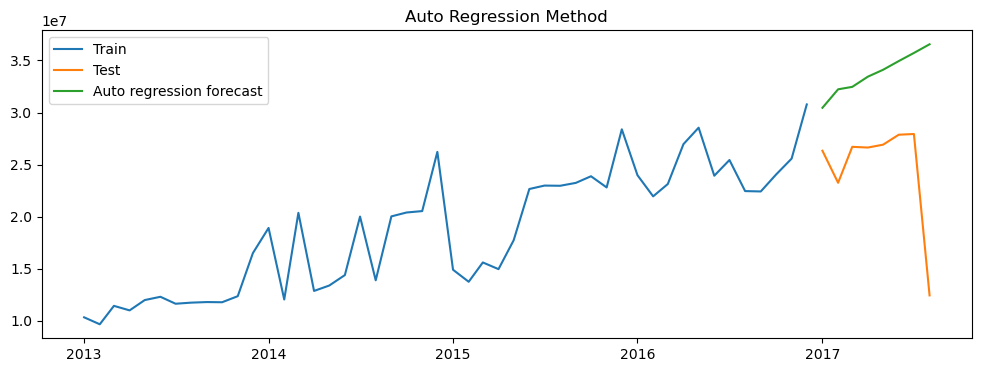

In [ ]:
#### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'] [test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()



#### Calculate R2, RMSE and MAPE

In [ ]:
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_hat_ar['ar_forecast'][:test.index.min()] )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_hat_ar['ar_forecast'][:test.index.min()])
train_r2_score = r2_score(train['sales'], y_hat_ar['ar_forecast'][:test.index.min()])

test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_ar['ar_forecast'][test.index.min():])
Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['Auto Regression (AR) method'], 'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])

Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240
0,Holt Winters' multiplicative method,0.777,-0.299,2747599.780,5530998.830,0.119,22.080
0,Auto Regression (AR) method,0.391,-3.892,4541519.590,10732685.530,0.191,46.930


**Inference:** AR model is not performing well in comparison of rest of the models, we tried with different lag orders but it's giving insignificant errors.

### 2. Moving Average Model (MA)

It models the future forecasts using past forecast errors in a regression-like model. This model has a parameter ‘q’ called window size over which linear combination of errors are calculated.

In [ ]:
model = ARIMA(train_data_boxcox_diff, order =(0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.021
ma.L1.y   -1.000
dtype: float64


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


#### Recover original time series forecast

In [ ]:
y_hat_ma = ts_data_boxcox_diff.copy()   #create a copy of transformed and differencing data
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(ts_data_boxcox_diff.index.min(), ts_data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()   #cumulative sum of differencing
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(ts_data_boxcox[0])  #added first row
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])     # exponential to get the original series

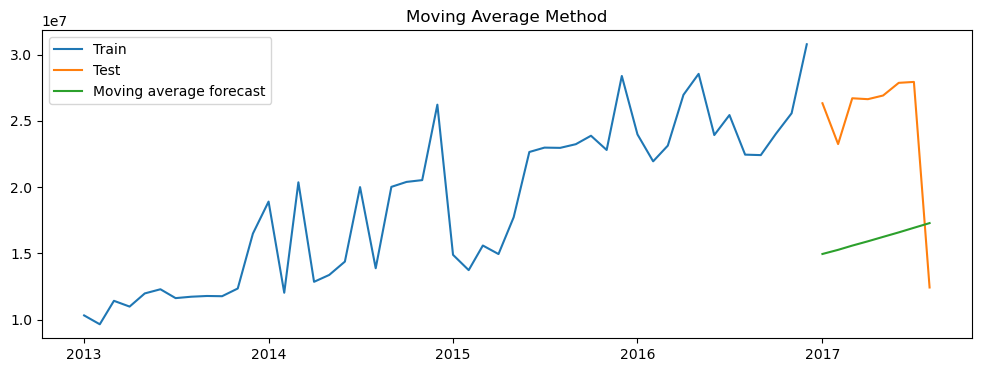

In [ ]:
#### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'] [test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [ ]:
#### Calculate RMSE and MAPE
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_hat_ma['ma_forecast'][:test.index.min()] )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_hat_ma['ma_forecast'][:test.index.min()])
train_r2_score = r2_score(train['sales'], y_hat_ma['ma_forecast'][:test.index.min()])

test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_ma['ma_forecast'][test.index.min():])
Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['Moving Average (MA) Method'],'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240
0,Holt Winters' multiplicative method,0.777,-0.299,2747599.780,5530998.830,0.119,22.080
0,Auto Regression (AR) method,0.391,-3.892,4541519.590,10732685.530,0.191,46.930
0,Moving Average (MA) Method,-2.933,-3.336,11543598.380,10103707.230,0.440,39.730


**Inference:** MA model is performing well in comparison with simple auto regression but its still under performing though it captures the trend but doesn't captures seasonality in comparison holt's winter methods methods which capture the seasonality.

### 3. Auto Regressive Moving Average (ARMA)

A time series that exhibits the characteristics of an AR(p) and/or an MA(q) process can be modelled using an ARMA(p,q) model.


In [ ]:
# model fitting
model = ARIMA(train_data_boxcox_diff, order =(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.021
ar.L1.y    0.218
ma.L1.y   -1.000
dtype: float64


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# Recover original time series forecast

y_hat_arma = ts_data_boxcox_diff.copy()   #create a copy of transformed and differencing data
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(ts_data_boxcox_diff.index.min(), ts_data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()   #cumulative sum of differencing
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(ts_data_boxcox[0])  #added first row
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])     # exponential to get the original series

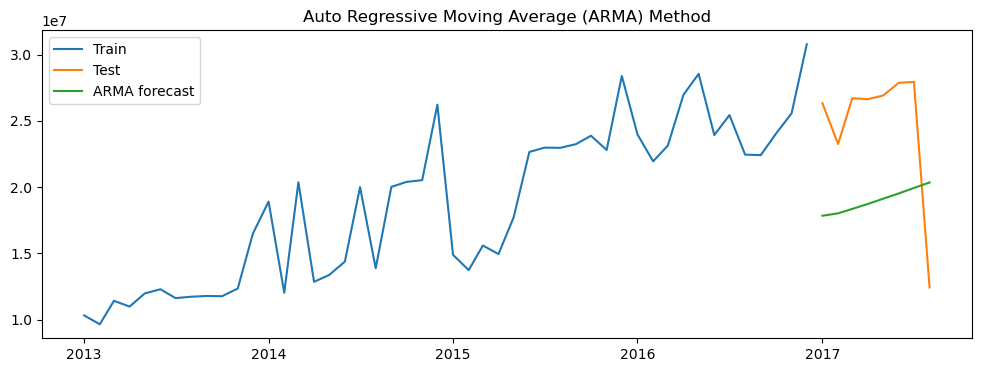

In [ ]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_arma['arma_forecast'] [test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average (ARMA) Method')
plt.show()

In [ ]:
# Calculate RMSE and MAPE
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_hat_arma['arma_forecast'][:test.index.min()] )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_hat_arma['arma_forecast'][:test.index.min()])
train_r2_score = r2_score(train['sales'], y_hat_arma['arma_forecast'][:test.index.min()])


test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_arma['arma_forecast'][test.index.min():])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_arma['arma_forecast'][test.index.min():])

Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['ARMA'], 'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240
0,Holt Winters' multiplicative method,0.777,-0.299,2747599.780,5530998.830,0.119,22.080
0,Auto Regression (AR) method,0.391,-3.892,4541519.590,10732685.530,0.191,46.930
0,Moving Average (MA) Method,-2.933,-3.336,11543598.380,10103707.230,0.440,39.730


**Inference:** We observed in the graph that the ARMA model is slightly underforecast though it captured the level and trend somewhat but still does not capture the seasonality but it is better than the AR and MA.

**_`Point to be noted: In previous models we applied both the boxcox transformation and differencing in order to covert the data into a stationary time-series data. But in ARIMA model we just need to apply boxcox before building the model and let the model take care of the differencing i.e. the trend component itself.`_**

### 4. Auto Regressive Integrated Moving Average (ARIMA) model

Models a series with the trend. ARIMA (p,d,q) has an embedded parameter that difference the series to remove the trend and later integrate it into the original series. 
 

In [ ]:
# model fitting, used transformed data only and let the model take care or differencing.
model = ARIMA(train_data_boxcox, order =(1,1,1))     # Used 1st order differencing (d=1)
model_fit = model.fit()
print(model_fit.params)

const        0.021
ar.L1.D.y    0.218
ma.L1.D.y   -1.000
dtype: float64


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**Checkpoint:** Here, we can notice that parameters are exactly similar to what we obtained in ARMA model so this means both the models are quite similar. The only difference is that in ARMA model we are doing differencing manually but here model takes care of it.

In [ ]:
# Recover original time series forecast

y_hat_arima = ts_data_boxcox_diff.copy()   #create a copy of transformed and differencing data
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(ts_data_boxcox_diff.index.min(), ts_data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()   #cumulative sum of differencing
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(ts_data_boxcox[0])  #added cumsum to the boxcox
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])     # exponential to get the original series

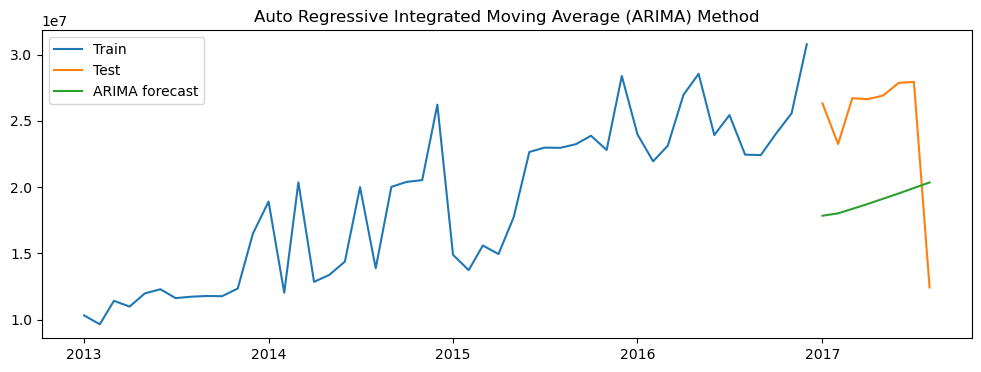

In [ ]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'] [test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average (ARIMA) Method')
plt.show()

**Inference:** So, graph is as expected exactly the same as ARMA forecast model because here we are just passing the non-difference data into the ARIMA model and specify that ARIMA does one-level of differencing. That's the only difference between both the models.


In [ ]:
# Calculate RMSE and MAPE
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_hat_arima['arima_forecast'][:test.index.min()] )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_hat_arima['arima_forecast'][:test.index.min()])
train_r2_score = r2_score(train['sales'], y_hat_arima['arima_forecast'][:test.index.min()])

test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_arima['arima_forecast'][test.index.min():])

Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['ARIMA Method'],'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])

Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240
0,Holt Winters' multiplicative method,0.777,-0.299,2747599.780,5530998.830,0.119,22.080
0,Auto Regression (AR) method,0.391,-3.892,4541519.590,10732685.530,0.191,46.930
0,Moving Average (MA) Method,-2.933,-3.336,11543598.380,10103707.230,0.440,39.730


**Inference:** As expected the metrics came out to be exacty the same as ARMA model.

_**`Till now none of the models captured the seasonality of the series. Now, we will build an autoregressive model that captures seasonality as well.`**_

### 5. Seasonal Auto Regressive Integrated Moving Average (SARIMA) model

SARIMA brings all the features of an ARIMA model with an extra feature - seasonality. It contains:

- **Non-seasonal elements:** ‘p’, ‘d’, ‘q’ 
- **Seasonal elements:** ‘P’, ‘D’, ‘Q’


In [ ]:
# imported library from the same statsmodels package
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# model fitting  
model = SARIMAX(train_data_boxcox, order =(1,1,1), seasonal_order= (1,1,1,12))   # we have monthly data so, seasonality is 12 
model_fit = model.fit()
print(model_fit.params)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1      -0.454
ma.L1      -0.038
ar.S.L12   -0.299
ma.S.L12   -0.975
sigma2      0.019
dtype: float64


In [ ]:
# Recover original time series forecast. 

y_hat_sarima = ts_data_boxcox_diff.copy()   #create a copy of transformed and differencing data
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(ts_data_boxcox_diff.index.min(), ts_data_boxcox_diff.index.max())
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox_diff'].cumsum()   #cumulative sum of differencing
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox'].add(ts_data_boxcox[0])  #added cumsum to the boxcox
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])     # exponential to get the original series

**Note:** One thing to notice here is that the prediction or the future forecast that we get is actually integrated back as SARIMAX function does the same by default internally. So, we get the forecasted series of the transformed series only, so, no need to do the integration externally. This is the fundamental difference between the SARIMA and ARIMA model i.e. here, we dont need to do cumsum and add it to the boxcox intercept manually in order to get the non-difference series .



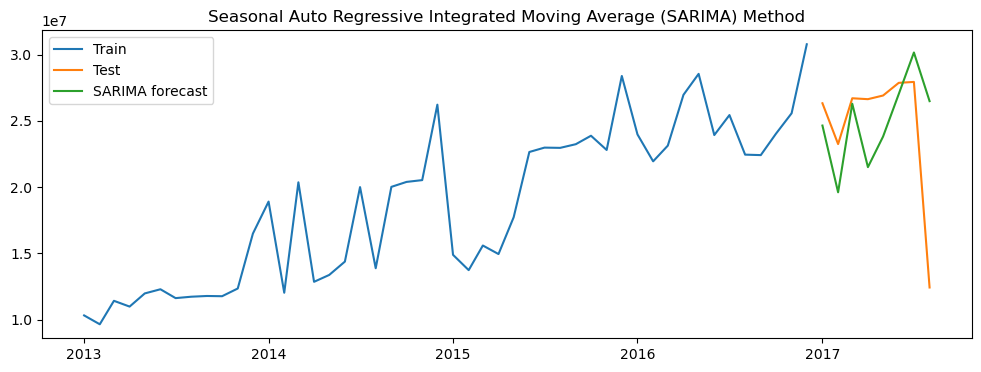

In [ ]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'] [test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average (SARIMA) Method')
plt.show()

**Inference:** Here, the graph shows some seasonality as expected. Compared to prior ARIMA models, this is an improved model.



In [ ]:
# Calculate RMSE and MAPE
train_rmse = np.sqrt(mean_squared_error(train['sales'],y_hat_sarima['sarima_forecast'][:test.index.min()] )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_hat_sarima['sarima_forecast'][:test.index.min()])
train_r2_score = r2_score(train['sales'], y_hat_sarima['sarima_forecast'][:test.index.min()])

test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_sarima['sarima_forecast'][test.index.min():])
Temp_Model_Metrics = pd.DataFrame({'Algo_Name':['SARIMA Method'], 'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])

Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240
0,Holt Winters' multiplicative method,0.777,-0.299,2747599.780,5530998.830,0.119,22.080
0,Auto Regression (AR) method,0.391,-3.892,4541519.590,10732685.530,0.191,46.930
0,Moving Average (MA) Method,-2.933,-3.336,11543598.380,10103707.230,0.440,39.730


**Inference:** Here, we can see SARIMA has comparatively less error than all the previous ARIMA models but it is under performing in comparison with the smoothing techniques even after capturing all the factors such as level, trend and seasonality. This means that data does not contains sesonality which is one of the important factor in order to get the optimum forecasting accuracy.

### 6. (SARIMAX)

Sometimes the irregularity in the data is due to an extra factor rather. So, there is an another autoregressive model which models an external variable along with the non-seasonal and seasonal components.

It has 3 compoments:

- Non-seasonal elements
- Seasonal elements
- Exogenous variable



In [ ]:
model=sm.tsa.statespace.SARIMAX(train_data_boxcox,order=(1, 1, 1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:

y_hat_sarimax = ts_data_boxcox_diff.copy()   #create a copy of transformed and differencing data
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(ts_data_boxcox_diff.index.min(), ts_data_boxcox_diff.index.max())
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox_diff'].cumsum()   #cumulative sum of differencing
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox'].add(ts_data_boxcox[0])  #added cumsum to the boxcox
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])  

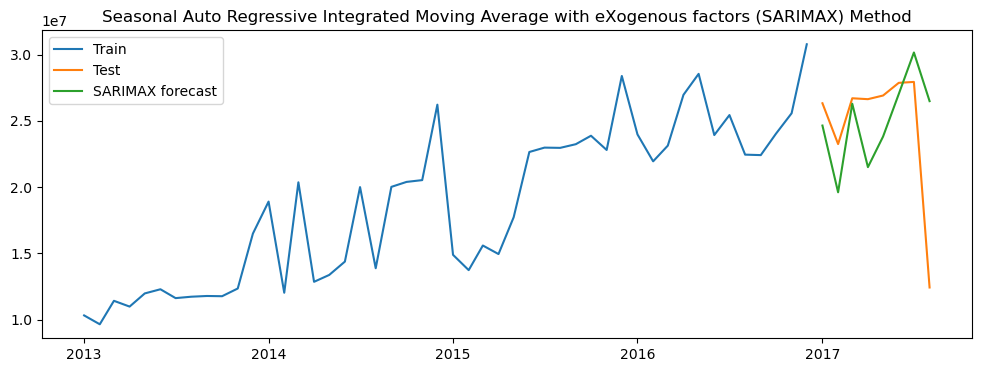

In [ ]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'] [test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average with Exogenous factors (SARIMAX) Method')
plt.show()

In [ ]:
# Calculate RMSE and MAPE
pd.set_option('display.float_format', lambda x: '%.3f' % x)

train_rmse = np.sqrt(mean_squared_error(train['sales'],y_hat_sarimax['sarimax_forecast'][:test.index.min()] )).round(2)
train_mape = mean_absolute_percentage_error(train['sales'], y_hat_sarimax['sarimax_forecast'][:test.index.min()])
train_r2_score = r2_score(train['sales'], y_hat_sarimax['sarimax_forecast'][:test.index.min()])

test_rmse = np.sqrt(mean_squared_error(test['sales'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
test_mape = np.round(np.mean(np.abs(test['sales']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['sales'])*100,2)
test_r2_score = r2_score(test['sales'], y_hat_sarimax['sarimax_forecast'][test.index.min():])
Temp_Model_Metrics  = pd.DataFrame({'Algo_Name':['SARIMAX Method'], 'r2-Score Train':[train_r2_score],'r2-Score Test':[test_r2_score],'RMSE Train': [train_rmse],'RMSE Test': [test_rmse],'MAPE Train':[train_mape],'MAPE Test': [test_mape]})
Model_Metrics = pd.concat([Model_Metrics, Temp_Model_Metrics])
Model_Metrics

,Algo_Name,r2-Score Train,r2-Score Test,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,Linear Regression,0.238,0.240,0.008,0.008,2614516399003.291,2615270497162.266
0,Random Forest,0.993,0.949,0.001,0.002,5027911521.349,13312302961.711
0,XG Boost,0.937,0.917,0.002,0.003,413412000552.158,411677665456.706
0,Simple moving average forecast,1.000,-1.538,0.000,7730283.100,0.000,32.820
0,Simple exponential smoothing forecast,0.640,-0.027,3490259.540,4917828.470,0.137,18.570
0,Holt's exponential smoothing method,0.250,-0.056,5039427.740,4985622.230,0.215,21.020
0,Holt Winters' Additive method,0.794,-0.370,2642832.020,5679146.070,0.123,18.240
0,Holt Winters' multiplicative method,0.777,-0.299,2747599.780,5530998.830,0.119,22.080
0,Auto Regression (AR) method,0.391,-3.892,4541519.590,10732685.530,0.191,46.930
0,Moving Average (MA) Method,-2.933,-3.336,11543598.380,10103707.230,0.440,39.730
